<a id="section-1"></a>
# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:150%;text-align:center;border-radius:10px 10px;">Toward Early Detection of Parkinson's Disease: Integrating Novel Proteomic Biomarkers for Predictive Analysis</p>

##### Analysis by Joan Jaylani
Data downloaded with permission from Parkinson's Progression Markers Initiative (PPMI) <br>
https://www.ppmi-info.org/<br>
November 14, 2025

<a id="section-1"></a>
# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:125%;text-align:center;border-radius:10px 10px;">1. Introduction</p>

#### This study investigates the predictive utility of proteomic biomarkers for identifying individuals at risk for Parkinson’s disease Datasets were obtained from the Parkinson's Progression Markers Initiative (PPMI), integrating both protein and peptide expression values derived from biospecimen assays

#### PPMI is a global observation study that researches biomarkers for Parkinson’s Disease and related neurological disorders. The PPMI has the largest collection of images, clinical research, and biological specimens in the world and has research conducted in the United States, Europe, Israel, and Australia. The data is available upon approval to academic and industry researchers.¶

<a id="section-3"></a>
# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:125%;text-align:center;border-radius:10px 10px;">2. Objective</p>

#### The project explores predictive biomarkers for Parkinson's disease, aiming to enable earlier intervention, potentially before clinical symptoms emerge, to slow disease progression and significantly enhance the quality of life for diagnosed individuals, to surpass what current methods allow.

<a id="section-3"></a>
# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:125%;text-align:center;border-radius:10px 10px;">3. Importing Libraries</p>

In [77]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from scipy import stats

<a id="section-4"></a>
# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:125%;text-align:center;border-radius:10px 10px;">4. Loading the Dataset</p>

#### Note: This data originated from the PPMI Biospecimen_Analysis_Results.csv but was significantly preprocessed in a prior notebook to pivot the data, analyze, and remove rows and columns with > 20% missing data, remove columns unrelated to this analysis, and impute missing values with the mean values.

In [81]:
#Loading the dataset
BIO_df = pd.read_excel("AS_Correlation_Markers.xlsx")

<a id="section-5"></a>
# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:125%;text-align:center;border-radius:10px 10px">5. Data Exploration </p>

In [84]:
print('Blood Biomarkers for PD dataframe shape:  ', BIO_df.shape)

Blood Biomarkers for PD dataframe shape:   (192, 12)


In [86]:
BIO_df.head()

,Alpha_Synuclein,CATL1_HUMAN|VFQEPLFYEAPR|y3+,Plasma_aSN_ELISA_after_ApoE_depletion_(rep_1),Plasma_aSN_ELISA_before_ApoE_depletion_(rep_1),Taurine,Nicotinamide,TTHY_HUMAN|VEIDTK|y2+,CATL1_HUMAN|VFQEPLFYEAPR|y3+.1,DAG1_HUMAN|GVHYISVSATR|y3+,NeuroX_rs17649553_T,NeuroX_rs591323_A,PD_LABEL
0,14411.2215,0.5439,15155.85664,16181.56159,27.797473,162.16795,2.7304,0.5439,0.6052,0.000000,0.000000,0
1,8538.5810,0.3610,10030.70588,13321.90169,32.047767,60.84400,1.4681,0.3610,0.1708,1.000000,0.000000,1
2,18705.8370,0.2519,18447.55920,28688.62644,24.549640,62.14475,5.6942,0.2519,0.2832,0.000000,1.000000,1
3,46732.6405,0.6573,51571.65548,95734.93752,44.887112,130.87825,2.5745,0.6573,0.5039,2.000000,1.000000,1
4,35196.4390,0.2812,54450.00649,75312.81198,47.694334,142.84310,3.9609,0.2812,0.3252,0.327778,0.502793,0


In [88]:
print(BIO_df['PD_LABEL'].value_counts())

PD_LABEL
1    109
0     83
Name: count, dtype: int64


In [90]:
# Drop rows that have 10 or more NaN values
BIO_pivot_df_filtered = BIO_df.dropna(thresh=BIO_df.shape[1] - 9)


In [92]:
BIO_pivot_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 12 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Alpha_Synuclein                                 192 non-null    float64
 1   CATL1_HUMAN|VFQEPLFYEAPR|y3+                    192 non-null    float64
 2   Plasma_aSN_ELISA_after_ApoE_depletion_(rep_1)   192 non-null    float64
 3   Plasma_aSN_ELISA_before_ApoE_depletion_(rep_1)  192 non-null    float64
 4   Taurine                                         192 non-null    float64
 5   Nicotinamide                                    192 non-null    float64
 6   TTHY_HUMAN|VEIDTK|y2+                           192 non-null    float64
 7   CATL1_HUMAN|VFQEPLFYEAPR|y3+.1                  192 non-null    float64
 8   DAG1_HUMAN|GVHYISVSATR|y3+                      192 non-null    float64
 9   NeuroX_rs17649553_T                        

In [94]:
# Total missing values per column
missing_count = BIO_df.isnull().sum()

# Percentage of missing values per column
missing_percent = BIO_df.isnull().mean() * 100

# Combine into a single DataFrame
missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_percent
})

# Sort by highest percentage missing
missing_summary = missing_summary.sort_values(by='Missing Percentage', ascending=False)

# Display top rows
print(missing_summary.head(100))  # You can increase the number if needed


                                                Missing Count  \
Alpha_Synuclein                                             0   
CATL1_HUMAN|VFQEPLFYEAPR|y3+                                0   
Plasma_aSN_ELISA_after_ApoE_depletion_(rep_1)               0   
Plasma_aSN_ELISA_before_ApoE_depletion_(rep_1)              0   
Taurine                                                     0   
Nicotinamide                                                0   
TTHY_HUMAN|VEIDTK|y2+                                       0   
CATL1_HUMAN|VFQEPLFYEAPR|y3+.1                              0   
DAG1_HUMAN|GVHYISVSATR|y3+                                  0   
NeuroX_rs17649553_T                                         0   
NeuroX_rs591323_A                                           0   
PD_LABEL                                                    0   

                                                Missing Percentage  
Alpha_Synuclein                                                0.0  
CATL1_HUMAN|VFQE

In [96]:
print("Any NaNs?", BIO_df.isnull().values.any())


Any NaNs? False


<a id="section-6"></a>
# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:125%;text-align:center;border-radius:10px 10px;;">6. Partitioning Data and Exploring Features</p>

In [99]:
from sklearn.model_selection import train_test_split

X = BIO_df.drop(columns=['PD_LABEL'])
y = BIO_df['PD_LABEL']

# Stratified split to preserve class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # 👈 this is the key fix
)


In [101]:
print("Overall class distribution:")
print(y.value_counts())

print("\nTrain set class distribution:")
print(y_train.value_counts())

print("\nTest set class distribution:")
print(y_test.value_counts())


Overall class distribution:
PD_LABEL
1    109
0     83
Name: count, dtype: int64

Train set class distribution:
PD_LABEL
1    87
0    66
Name: count, dtype: int64

Test set class distribution:
PD_LABEL
1    22
0    17
Name: count, dtype: int64


In [103]:
BIO_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 12 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Alpha_Synuclein                                 192 non-null    float64
 1   CATL1_HUMAN|VFQEPLFYEAPR|y3+                    192 non-null    float64
 2   Plasma_aSN_ELISA_after_ApoE_depletion_(rep_1)   192 non-null    float64
 3   Plasma_aSN_ELISA_before_ApoE_depletion_(rep_1)  192 non-null    float64
 4   Taurine                                         192 non-null    float64
 5   Nicotinamide                                    192 non-null    float64
 6   TTHY_HUMAN|VEIDTK|y2+                           192 non-null    float64
 7   CATL1_HUMAN|VFQEPLFYEAPR|y3+.1                  192 non-null    float64
 8   DAG1_HUMAN|GVHYISVSATR|y3+                      192 non-null    float64
 9   NeuroX_rs17649553_T                        

### XG Boost and Random Forest Models Run, Using XG Boost Feature Selection to Top 30 Features, K-Fold (10)


 Random Forest - Classification Report (Pooled 10-Fold CV):
              precision    recall  f1-score   support

           0       0.47      0.43      0.45        83
           1       0.59      0.63      0.61       109

    accuracy                           0.55       192
   macro avg       0.53      0.53      0.53       192
weighted avg       0.54      0.55      0.54       192


 XGBoost - Classification Report (Pooled 10-Fold CV):
              precision    recall  f1-score   support

           0       0.50      0.51      0.50        83
           1       0.62      0.61      0.62       109

    accuracy                           0.57       192
   macro avg       0.56      0.56      0.56       192
weighted avg       0.57      0.57      0.57       192


AUC (Random Forest): 0.593
AUC (XGBoost): 0.577


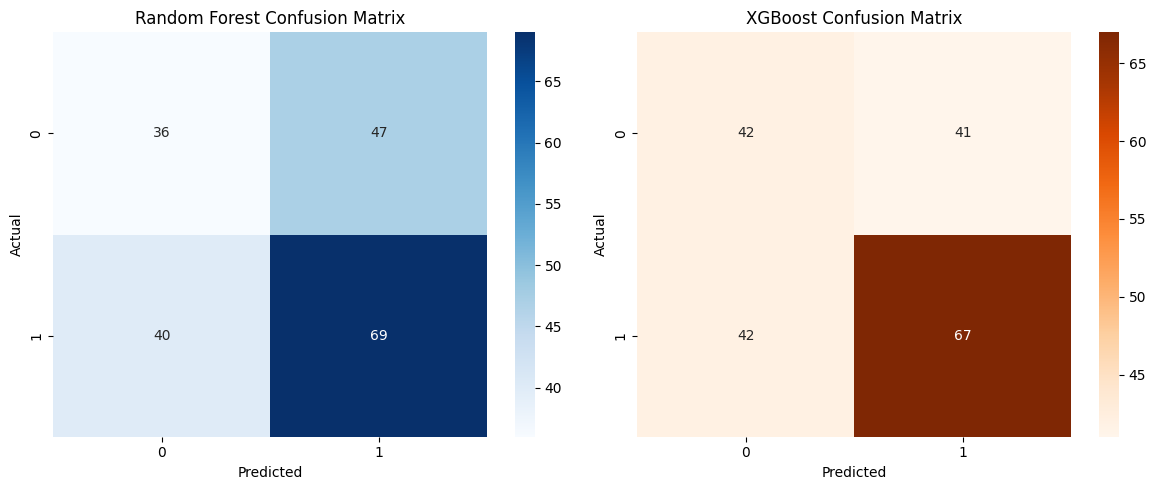

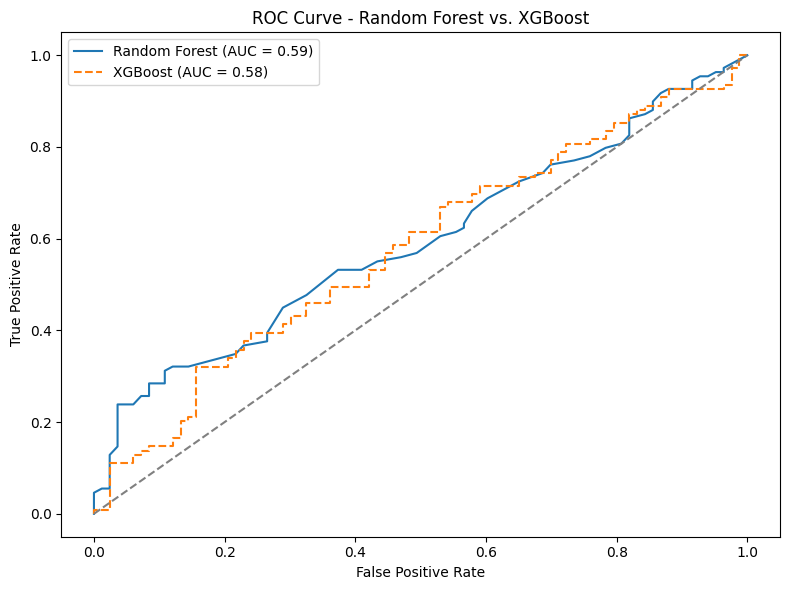

In [106]:
# fixed data leakage and changed feature selection to xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, classification_report, confusion_matrix, roc_curve
)
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Load your dataset
X = BIO_df.drop(columns=["PD_LABEL"])
y = BIO_df["PD_LABEL"]

# Set up cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# -------------------- RANDOM FOREST --------------------
y_true_all_rf, y_pred_all_rf, y_prob_all_rf = [], [], []

for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    #  In-fold feature selection with XGBoost
    xgb_selector = XGBClassifier(eval_metric="logloss", random_state=42)
    xgb_selector.fit(X_train, y_train)
    top_features = pd.Series(xgb_selector.feature_importances_, index=X_train.columns)\
                    .sort_values(ascending=False).head(30).index

    X_train_reduced = X_train[top_features]
    X_test_reduced = X_test[top_features]

    #  Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_reduced)
    X_test_scaled = scaler.transform(X_test_reduced)

    # Fit and predict
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train_scaled, y_train)
    y_pred = rf_model.predict(X_test_scaled)
    y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

    y_true_all_rf.extend(y_test)
    y_pred_all_rf.extend(y_pred)
    y_prob_all_rf.extend(y_prob)

# -------------------- XGBOOST --------------------
y_true_all_xgb, y_pred_all_xgb, y_prob_all_xgb = [], [], []

for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    #  In-fold feature selection with XGBoost
    xgb_selector = XGBClassifier(eval_metric="logloss", random_state=42)
    xgb_selector.fit(X_train, y_train)
    top_features = pd.Series(xgb_selector.feature_importances_, index=X_train.columns)\
                    .sort_values(ascending=False).head(30).index

    X_train_reduced = X_train[top_features]
    X_test_reduced = X_test[top_features]

    #  Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_reduced)
    X_test_scaled = scaler.transform(X_test_reduced)

    # Fit and predict
    xgb_model = XGBClassifier(
        eval_metric="logloss",
        random_state=42,
        n_estimators=50,
        max_depth=3,
        verbosity=0
    )
    xgb_model.fit(X_train_scaled, y_train)
    y_pred = xgb_model.predict(X_test_scaled)
    y_prob = xgb_model.predict_proba(X_test_scaled)[:, 1]

    y_true_all_xgb.extend(y_test)
    y_pred_all_xgb.extend(y_pred)
    y_prob_all_xgb.extend(y_prob)

# -------------------- Evaluation --------------------
# Classification reports

# Classification reports
print("\n Random Forest - Classification Report (Pooled 10-Fold CV):")
print(classification_report(y_true_all_rf, y_pred_all_rf, digits=2))

print("\n XGBoost - Classification Report (Pooled 10-Fold CV):")
print(classification_report(y_true_all_xgb, y_pred_all_xgb, digits=2))

# ROC-AUC Scores
auc_rf = roc_auc_score(y_true_all_rf, y_prob_all_rf)
auc_xgb = roc_auc_score(y_true_all_xgb, y_prob_all_xgb)
print(f"\nAUC (Random Forest): {auc_rf:.3f}")
print(f"AUC (XGBoost): {auc_xgb:.3f}")

# Confusion Matrices
cm_rf = confusion_matrix(y_true_all_rf, y_pred_all_rf)
cm_xgb = confusion_matrix(y_true_all_xgb, y_pred_all_xgb)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Oranges")
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# ROC Curves
fpr_rf, tpr_rf, _ = roc_curve(y_true_all_rf, y_prob_all_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_true_all_xgb, y_prob_all_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})", linestyle='--')
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest vs. XGBoost")
plt.legend()
plt.tight_layout()
plt.show()


✅ Updated xgb_top_5_features.csv with new top-5 features
✅ Updated xgb_top_10_features.csv with new top-10 features
✅ Updated xgb_top_30_features.csv with new top-30 features

XGBoost - Classification Report (Pooled 10-Fold CV):
              precision    recall  f1-score   support

           0       0.57      0.50      0.53        24
           1       0.67      0.73      0.70        33

    accuracy                           0.63        57
   macro avg       0.62      0.61      0.61        57
weighted avg       0.63      0.63      0.63        57

AUC (XGBoost): 0.614


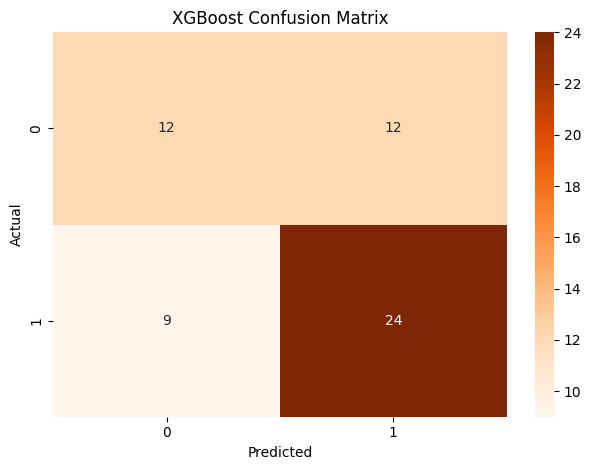

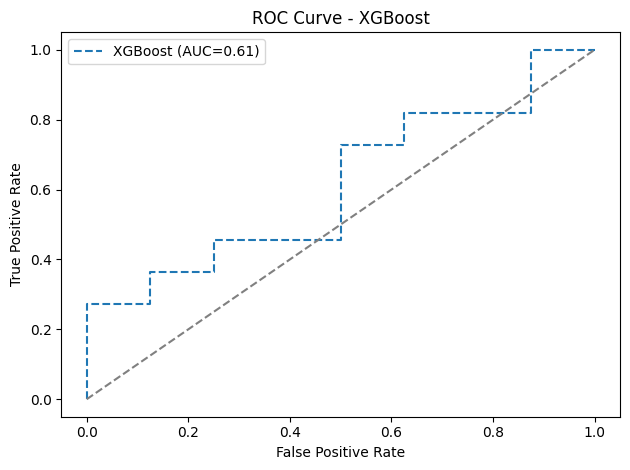

In [108]:
#NEW As of 11/11

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, classification_report, confusion_matrix, roc_curve
)
from xgboost import XGBClassifier
from pathlib import Path

# --- Config ---
SAVE_DIR = Path("xgb_results")
SAVE_DIR.mkdir(exist_ok=True)

# --- Data ---
X = BIO_df.drop(columns=["PD_LABEL"])
y = BIO_df["PD_LABEL"]

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# --- Collectors ---
y_true_all, y_pred_all, y_prob_all = [], [], []
feature_rankings = []

# --- Cross-validation loop ---
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Feature selection
    selector = XGBClassifier(eval_metric="logloss", random_state=42)
    selector.fit(X_train, y_train)

    feature_importances = pd.Series(selector.feature_importances_, index=X_train.columns)
    feature_importances.name = f"Fold_{fold}"
    feature_rankings.append(feature_importances)

    top_features = feature_importances.sort_values(ascending=False).head(30).index
    X_train_reduced, X_test_reduced = X_train[top_features], X_test[top_features]

    # Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_reduced)
    X_test_scaled = scaler.transform(X_test_reduced)

    # Fit main model
    xgb_model = XGBClassifier(eval_metric="logloss", random_state=42, n_estimators=50, max_depth=3)
    xgb_model.fit(X_train_scaled, y_train)
    y_pred = xgb_model.predict(X_test_scaled)
    y_prob = xgb_model.predict_proba(X_test_scaled)[:, 1]

    
    # Suppose model = your XGBClassifier, and X_train = your training data
    importances = xgb_model.feature_importances_
    feature_names = X_train.columns

top_df = (
    pd.DataFrame({"Biomarker": feature_names, "MeanImportance": importances})
    .sort_values("MeanImportance", ascending=False)
)

for n in [5, 10, 30]:
    top_df.head(n).to_csv(f"xgb_results/xgb_top_{n}_features.csv", index=False)
    print(f"✅ Updated xgb_top_{n}_features.csv with new top-{n} features")

    # Collect pooled data
    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)
    y_prob_all.extend(y_prob)

# --- Aggregate feature importance ---
feature_df = pd.concat(feature_rankings, axis=1).fillna(0)
feature_df["MeanImportance"] = feature_df.mean(axis=1)
feature_df = feature_df.sort_values("MeanImportance", ascending=False)

# Save all features
feature_df.to_csv(SAVE_DIR / "as_xgb_feature_importance_all_folds.csv")

# Save top-N feature subsets
for n in [5, 10, 30]:
    subset = feature_df.head(n).copy()
    subset.to_csv(SAVE_DIR / f"as_xgb_top_{n}_features.csv")

# Save pooled predictions
preds_df = pd.DataFrame({
    "y_true": y_true_all,
    "y_pred": y_pred_all,
    "y_prob": y_prob_all
})
preds_df.to_csv(SAVE_DIR / "xgb_predictions_pooled.csv", index=False)

# --- Evaluate model performance ---
print("\nXGBoost - Classification Report (Pooled 10-Fold CV):")
print(classification_report(y_true_all, y_pred_all, digits=2))

auc_xgb = roc_auc_score(y_true_all, y_prob_all)
print(f"AUC (XGBoost): {auc_xgb:.3f}")

# --- Confusion Matrix ---
cm = confusion_matrix(y_true_all, y_pred_all)
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_true_all, y_prob_all)
plt.plot(fpr, tpr, label=f"XGBoost (AUC={auc_xgb:.2f})", linestyle='--')
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.tight_layout()
plt.show()


In [110]:
BIO_df.head(5)


,Alpha_Synuclein,CATL1_HUMAN|VFQEPLFYEAPR|y3+,Plasma_aSN_ELISA_after_ApoE_depletion_(rep_1),Plasma_aSN_ELISA_before_ApoE_depletion_(rep_1),Taurine,Nicotinamide,TTHY_HUMAN|VEIDTK|y2+,CATL1_HUMAN|VFQEPLFYEAPR|y3+.1,DAG1_HUMAN|GVHYISVSATR|y3+,NeuroX_rs17649553_T,NeuroX_rs591323_A,PD_LABEL
0,14411.2215,0.5439,15155.85664,16181.56159,27.797473,162.16795,2.7304,0.5439,0.6052,0.000000,0.000000,0
1,8538.5810,0.3610,10030.70588,13321.90169,32.047767,60.84400,1.4681,0.3610,0.1708,1.000000,0.000000,1
2,18705.8370,0.2519,18447.55920,28688.62644,24.549640,62.14475,5.6942,0.2519,0.2832,0.000000,1.000000,1
3,46732.6405,0.6573,51571.65548,95734.93752,44.887112,130.87825,2.5745,0.6573,0.5039,2.000000,1.000000,1
4,35196.4390,0.2812,54450.00649,75312.81198,47.694334,142.84310,3.9609,0.2812,0.3252,0.327778,0.502793,0


In [111]:
from tqdm import tqdm
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
from pathlib import Path

# Paths
SAVE_DIR = Path("xgb_results")
THRESHOLD_DIR = SAVE_DIR / "threshold_analysis"
THRESHOLD_DIR.mkdir(exist_ok=True, parents=True)

# Dataset used in model
X = BIO_df.drop(columns=["PD_LABEL"])
y = BIO_df["PD_LABEL"]

# ------------------------------------------------------------
# Helper: compute per-feature threshold
# ------------------------------------------------------------
def compute_feature_threshold(feature_name, X, y):
    if feature_name not in X.columns:
        print(f"⚠️  Skipping missing feature: {feature_name}")
        return np.nan, np.nan, np.nan

    x = X[feature_name].values
    if len(np.unique(x)) < 3:  # skip binary/constant
        return np.nan, np.nan, np.nan

    fpr, tpr, thresholds = roc_curve(y, x)
    youden = tpr - fpr
    best_idx = np.argmax(youden)
    best_thr = thresholds[best_idx]
    auc = roc_auc_score(y, x)
    direction = ">" if np.mean(x[y == 1]) > np.mean(x[y == 0]) else "<"
    return best_thr, direction, auc

# ------------------------------------------------------------
# Compute per-feature thresholds for each top-N file
# ------------------------------------------------------------
for n in [5, 10, 30]:
    top_path = SAVE_DIR / f"xgb_top_{n}_features.csv"
    
    # Read safely whether or not header exists
    top_df = pd.read_csv(top_path)
    
    # --- Detect if first column contains feature names ---
    if "Biomarker" not in top_df.columns:
        first_col = top_df.columns[0]
        # Rename it only if it looks like an unnamed index (numeric 0, 'Unnamed: 0', etc.)
        if "Unnamed" in first_col or first_col == "0":
            top_df.rename(columns={first_col: "Biomarker"}, inplace=True)
        else:
            top_df["Biomarker"] = top_df[first_col]
    
    print(f"\n🔹 Computing feature thresholds for top-{n} features...")

    thresholds, directions, aucs = [], [], []
    for feature_name in top_df["Biomarker"].tolist():
        if feature_name not in X.columns:
            print(f"⚠️  Skipping missing feature: {feature_name}")
            thresholds.append(np.nan)
            directions.append(np.nan)
            aucs.append(np.nan)
            continue
        thr, direction, auc = compute_feature_threshold(feature_name, X, y)
        thresholds.append(thr)
        directions.append(direction)
        aucs.append(auc)

    top_df["Threshold"] = thresholds
    top_df["Direction"] = directions
    top_df["FeatureAUC"] = aucs
    top_df["Weight"] = top_df["MeanImportance"] / top_df["MeanImportance"].sum()

    out_cols = ["Biomarker", "Direction", "Threshold", "Weight", "MeanImportance", "FeatureAUC"]
    top_df[out_cols].to_csv(THRESHOLD_DIR / f"xgb_thresholds_top_{n}.csv", index=False)
    print(f"✅ Saved: {THRESHOLD_DIR / f'xgb_thresholds_top_{n}.csv'}")


print("\n🎯 Completed: per-feature thresholds generated for top-5, top-10, and top-30 features.")
print(f"📂 Output folder: {THRESHOLD_DIR.resolve()}")



🔹 Computing feature thresholds for top-5 features...
✅ Saved: xgb_results\threshold_analysis\xgb_thresholds_top_5.csv

🔹 Computing feature thresholds for top-10 features...
✅ Saved: xgb_results\threshold_analysis\xgb_thresholds_top_10.csv

🔹 Computing feature thresholds for top-30 features...
✅ Saved: xgb_results\threshold_analysis\xgb_thresholds_top_30.csv

🎯 Completed: per-feature thresholds generated for top-5, top-10, and top-30 features.
📂 Output folder: C:\Users\carba\Buan_690_Data_Practicum\ParkinsonsResearch\xgb_results\threshold_analysis


In [112]:
top5 = pd.read_csv("xgb_results/xgb_top_5_features.csv")

# List features not found in your dataframe
missing = [f for f in top5['Biomarker'] if f not in BIO_df.columns]
print("Missing features:", missing)

# And check possible close matches
import difflib
for f in missing:
    match = difflib.get_close_matches(f, BIO_df.columns, n=3, cutoff=0.6)
    print(f"{f} -> Possible matches: {match}")

Missing features: []


In [119]:
# ============================================================
# NOT SURE THIS WORKS BUT DON'T DELETE YET
# Leak-free XGBoost Top-N Selection, Per-Fold Thresholding,
# and Logistic Calibration on Threshold Rule Scores
# ============================================================

import numpy as np
import pandas as pd

from typing import Dict, List, Tuple
from dataclasses import dataclass

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    roc_auc_score, balanced_accuracy_score, confusion_matrix
)
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


# -----------------------------
# Config
# -----------------------------
XGB_KW = dict(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    reg_alpha=0.0,
    eval_metric="logloss",
    random_state=42,
    n_jobs=0
)

OUTER_FOLDS = 5
INNER_FOLDS = 3
TOP_N_LIST = [5, 10, 30]
THRESH_GRID = np.linspace(0.05, 0.95, 181)  # dense, robust grid for τ


# -----------------------------
# Helpers
# -----------------------------
def _xgb_feature_importance_weight(model: XGBClassifier, feature_names: List[str]) -> pd.Series:
    """Return 'weight' importances for all features (fill 0 if absent)."""
    booster = model.get_booster()
    imp_map = booster.get_score(importance_type="weight")  # dict: feature -> split count
    return pd.Series({fn: imp_map.get(fn, 0.0) for fn in feature_names}, name="Weight")


def _fit_xgb(X: pd.DataFrame, y: pd.Series) -> XGBClassifier:
    model = XGBClassifier(**XGB_KW)
    model.fit(X, y)
    return model


def _choose_threshold_balacc(y_true: np.ndarray, y_prob: np.ndarray) -> float:
    """Choose threshold τ maximizing Balanced Accuracy on given predictions."""
    best_tau, best_balacc = 0.5, -np.inf
    for tau in THRESH_GRID:
        y_pred = (y_prob >= tau).astype(int)
        balacc = balanced_accuracy_score(y_true, y_pred)
        if balacc > best_balacc:
            best_balacc, best_tau = balacc, tau
    return best_tau


@dataclass
class FoldCalibrator:
    """Logistic calibration on threshold rule scores: s = p - τ."""
    intercept_: float
    coef_: float

    def predict_proba(self, s: np.ndarray) -> np.ndarray:
        z = self.intercept_ + self.coef_ * s
        # numerically stable sigmoid
        p = 1.0 / (1.0 + np.exp(-np.clip(z, -40, 40)))
        return p

def _fit_logistic_calibrator(scores: np.ndarray, y: np.ndarray) -> FoldCalibrator:
    lr = LogisticRegression(solver="lbfgs", max_iter=1000)
    lr.fit(scores.reshape(-1, 1), y)
    return FoldCalibrator(float(lr.intercept_[0]), float(lr.coef_[0, 0]))


def _metrics_from_preds(y_true: np.ndarray, y_prob: np.ndarray, tau: float) -> Dict[str, float]:
    y_pred = (y_prob >= tau).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sens = tp / (tp + fn) if (tp + fn) else np.nan  # TPR
    spec = tn / (tn + fp) if (tn + fp) else np.nan  # TNR
    ppv  = tp / (tp + fp) if (tp + fp) else np.nan  # Precision
    npv  = tn / (tn + fn) if (tn + fn) else np.nan
    balacc = balanced_accuracy_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)
    return dict(AUC=auc, Sensitivity=sens, Specificity=spec, PPV=ppv, NPV=npv, BalancedAcc=balacc)


# -----------------------------
# Core routine (outer CV loop)
# -----------------------------
def evaluate_topN_with_inner_threshold_and_calibration(
    X: pd.DataFrame,
    y: pd.Series,
    top_n_list: List[int] = TOP_N_LIST,
    outer_folds: int = OUTER_FOLDS,
    inner_folds: int = INNER_FOLDS,
    prefix: str = "xgb_pd"
):
    assert isinstance(X, pd.DataFrame), "X must be a pandas DataFrame with column names."
    feature_names = list(X.columns)

    outer_cv = StratifiedKFold(n_splits=outer_folds, shuffle=True, random_state=42)

    # Collectors for per-N summaries
    perN_fold_metrics: Dict[int, List[Dict]] = {n: [] for n in top_n_list}
    perN_fold_thresholds: Dict[int, List[float]] = {n: [] for n in top_n_list}
    perN_feature_tables: Dict[int, List[pd.DataFrame]] = {n: [] for n in top_n_list}

    for fold_idx, (tr_idx, te_idx) in enumerate(outer_cv.split(X, y), start=1):
        X_tr, X_te = X.iloc[tr_idx], X.iloc[te_idx]
        y_tr, y_te = y.iloc[tr_idx], y.iloc[te_idx]

        # --- In-fold (training-only) selection: get importances on full training split ---
        base_model = _fit_xgb(X_tr, y_tr)  # uses only training split
        imp_series = _xgb_feature_importance_weight(base_model, feature_names)
        imp_ranked = imp_series.sort_values(ascending=False)

        # for each top-N list, run inner CV to derive τ and calibrator, then evaluate on outer test
        for top_n in top_n_list:
            feats = imp_ranked.index[:top_n].tolist()

            # ---------- INNER CV on training split: gather OOF probs for threshold + calibration ----------
            inner_cv = StratifiedKFold(n_splits=inner_folds, shuffle=True, random_state=fold_idx * 101)
            oof_probs, oof_y = [], []

            for itr_idx, ival_idx in inner_cv.split(X_tr[feats], y_tr):
                X_itr, X_ival = X_tr[feats].iloc[itr_idx], X_tr[feats].iloc[ival_idx]
                y_itr, y_ival = y_tr.iloc[itr_idx], y_tr.iloc[ival_idx]

                model_inner = _fit_xgb(X_itr, y_itr)
                prob_ival = model_inner.predict_proba(X_ival)[:, 1]
                oof_probs.append(prob_ival)
                oof_y.append(y_ival.values)

            oof_probs = np.concatenate(oof_probs)
            oof_y = np.concatenate(oof_y)

            # Threshold τ*: maximize balanced accuracy using training-only OOF predictions
            tau_star = _choose_threshold_balacc(oof_y, oof_probs)

            # Logistic calibration on threshold rule scores s = p - τ* (fit on OOF)
            scores_tr = oof_probs - tau_star
            calibrator = _fit_logistic_calibrator(scores_tr, oof_y)

            # ---------- Fit final in-fold model on all training data (with selected features) ----------
            final_model = _fit_xgb(X_tr[feats], y_tr)

            # ---------- Evaluate on held-out outer test split ----------
            prob_te = final_model.predict_proba(X_te[feats])[:, 1]
            scores_te = prob_te - tau_star  # threshold rule score
            p_cal_te = calibrator.predict_proba(scores_te)

            # Metrics using raw prob + τ* (classification by threshold)
            metr_raw = _metrics_from_preds(y_te.values, prob_te, tau_star)

            # Also report metrics if we threshold calibrated prob at 0.5 (optional)
            metr_cal = _metrics_from_preds(y_te.values, p_cal_te, 0.5)
            metr_all = dict(
                Fold=fold_idx,
                TopN=top_n,
                Threshold=tau_star,
                **{f"RAW_{k}": v for k, v in metr_raw.items()},
                **{f"CAL_{k}": v for k, v in metr_cal.items()},
            )
            perN_fold_metrics[top_n].append(metr_all)
            perN_fold_thresholds[top_n].append(tau_star)

            # ---------- Save per-fold top-N feature table with weights and fold threshold ----------
            topN_table = (
                imp_ranked.reset_index()
                .rename(columns={"index": "Biomarker", "Weight": "Weight"})
                .head(top_n)
                .assign(Fold=fold_idx, Threshold=tau_star)
            )
            perN_feature_tables[top_n].append(topN_table)

            # CSV per-fold
            fold_csv = f"{prefix}_top{top_n}_features_fold{fold_idx}.csv"
            topN_table.to_csv(fold_csv, index=False)

        # end for top_n

    # ------------- Aggregate & Save -------------
    for top_n in top_n_list:
        # Per-fold metrics CSV
        fold_metrics_df = pd.DataFrame(perN_fold_metrics[top_n]).sort_values(["Fold"])
        fold_metrics_csv = f"{prefix}_top{top_n}_cv_metrics.csv"
        fold_metrics_df.to_csv(fold_metrics_csv, index=False)

        # Consensus feature table: mean weight + selection frequency + mean rank
        feat_tables = perN_feature_tables[top_n]
        all_feats = pd.concat(feat_tables, ignore_index=True)

        # Compute rank per fold from the order; earlier rows have lower rank
        all_feats["Rank"] = all_feats.groupby("Fold").cumcount() + 1

        consensus = (
            all_feats
            .groupby("Biomarker", as_index=False)
            .agg(
                MeanWeight=("Weight", "mean"),
                Selected_Folds=("Fold", "nunique"),
                MeanRank=("Rank", "mean")
            )
            .sort_values(["Selected_Folds", "MeanRank", "MeanWeight"], ascending=[False, True, False])
        )
        consensus_csv = f"{prefix}_top{top_n}_consensus_features.csv"
        consensus.to_csv(consensus_csv, index=False)

    # Grand summary across N: mean ± sd over folds (raw + calibrated)
    rows = []
    for top_n in top_n_list:
        mdf = pd.DataFrame(perN_fold_metrics[top_n])
        s = dict(TopN=top_n)
        for col in [c for c in mdf.columns if c.startswith(("RAW_", "CAL_")) or c == "Threshold"]:
            s[f"{col}_mean"] = float(np.nanmean(mdf[col]))
            s[f"{col}_std"] = float(np.nanstd(mdf[col]))
        rows.append(s)
    summary_df = pd.DataFrame(rows).sort_values("TopN")
    summary_csv = f"{prefix}_summary_across_topN.csv"
    summary_df.to_csv(summary_csv, index=False)

    print("\n--- Finished ---")
    print("Created files:")
    for top_n in top_n_list:
        print(f"  - {prefix}_top{top_n}_cv_metrics.csv")
        print(f"  - {prefix}_top{top_n}_consensus_features.csv")
        print(f"  - {prefix}_top{top_n}_features_fold<k>.csv  (one per fold)")
    print(f"  - {summary_csv}")

    return dict(
        perN_fold_metrics=perN_fold_metrics,
        perN_feature_tables=perN_feature_tables,
        summary=summary_df
    )
# ============================================================
#  CONSOLIDATION & PATIENT-LEVEL PREDICTION EXTENSION
# ============================================================

import json
from sklearn.preprocessing import StandardScaler

def consolidate_feature_thresholds(out_dict, prefix="pd_xgb_cv"):
    """
    Consolidate per-fold results into per-feature threshold panels.
    """
    consensus_panels = {}
    for top_n, tables in out_dict["perN_feature_tables"].items():
        all_feats = pd.concat(tables, ignore_index=True)
        # average weight, frequency, rank, and fold thresholds
        all_feats["Rank"] = all_feats.groupby("Fold").cumcount() + 1
        consensus = (
            all_feats
            .groupby("Biomarker", as_index=False)
            .agg(
                MeanWeight=("Weight", "mean"),
                Selected_Folds=("Fold", "nunique"),
                MeanRank=("Rank", "mean"),
                MeanThreshold=("Threshold", "mean")
            )
            .sort_values(["Selected_Folds", "MeanRank", "MeanWeight"], ascending=[False, True, False])
        )
        csv_name = f"{prefix}_panel_top{top_n}.csv"
        consensus.to_csv(csv_name, index=False)
        consensus_panels[top_n] = consensus
        print(f"✅ Saved feature threshold panel: {csv_name}")
    return consensus_panels


# ============================================================
#   SIMPLE PATIENT ENTRY FUNCTION
# ============================================================
def predict_patient_parkinsons(patient_values: dict, panel: pd.DataFrame,
                               mean_calibrator: tuple = (0.0, 1.0),
                               threshold_rule="weighted_sum"):
    """
    Predict Parkinson's vs Control using top-N consensus panel.

    Parameters
    ----------
    patient_values : dict
        Feature -> biomarker value mapping for one patient
    panel : DataFrame
        Consensus feature panel with MeanThreshold and MeanWeight columns
    mean_calibrator : tuple (intercept, coef)
        Logistic calibration parameters averaged across folds
    threshold_rule : str
        "weighted_sum" (default) or "simple_vote"

    Returns
    -------
    result : dict with probability and binary classification
    """

    inter, coef = mean_calibrator
    used_features = panel["Biomarker"].tolist()

    # compute rule scores
    rule_scores = []
    for _, row in panel.iterrows():
        feat, thr, w = row["Biomarker"], row["MeanThreshold"], row["MeanWeight"]
        val = patient_values.get(feat, np.nan)
        if np.isnan(val):
            raise ValueError(f"Missing feature {feat} in patient input.")
        rule_scores.append(w * (val - thr))

    # aggregate rule scores
    s = np.sum(rule_scores) if threshold_rule == "weighted_sum" else np.mean(rule_scores > 0)

    # logistic calibration
    z = inter + coef * s
    p = 1 / (1 + np.exp(-z))
    classification = int(p >= 0.5)
    return {"PD_Probability": p, "Classification": classification, "Score": s}


# -----------------------------
df = pd.read_csv("filtered_BIO_pivot_df.csv")
X = df.drop(columns=["PD_LABEL"])
y = df["PD_LABEL"]
out = evaluate_topN_with_inner_threshold_and_calibration(X, y, prefix="pd_xgb_cv")



--- Finished ---
Created files:
  - pd_xgb_cv_top5_cv_metrics.csv
  - pd_xgb_cv_top5_consensus_features.csv
  - pd_xgb_cv_top5_features_fold<k>.csv  (one per fold)
  - pd_xgb_cv_top10_cv_metrics.csv
  - pd_xgb_cv_top10_consensus_features.csv
  - pd_xgb_cv_top10_features_fold<k>.csv  (one per fold)
  - pd_xgb_cv_top30_cv_metrics.csv
  - pd_xgb_cv_top30_consensus_features.csv
  - pd_xgb_cv_top30_features_fold<k>.csv  (one per fold)
  - pd_xgb_cv_summary_across_topN.csv


,Alpha_Synuclein,Plasma_aSN_ELISA_after_ApoE_depletion_(rep_1),Plasma_aSN_ELISA_before_ApoE_depletion_(rep_1),Taurine,Nicotinamide,NeuroX_rs17649553_T,NeuroX_rs591323_A,TTHY_HUMAN|VEIDTK|y2+,DAG1_HUMAN|GVHYISVSATR|y3+,PD_LABEL,CATL1_HUMAN|VFQEPLFYEAPR|y3+,CATL1_HUMAN|VFQEPLFYEAPR|y3+.1
Alpha_Synuclein,1.000000,0.294919,0.288542,0.255522,0.192585,0.152096,0.138563,-0.009623,-0.077056,-0.152633,-0.159991,-0.159991
Plasma_aSN_ELISA_after_ApoE_depletion_(rep_1),0.294919,1.000000,0.975059,0.831680,0.703976,0.054281,-0.041621,0.157110,-0.037524,0.035108,-0.090258,-0.090258
Plasma_aSN_ELISA_before_ApoE_depletion_(rep_1),0.288542,0.975059,1.000000,0.844353,0.701021,0.073725,-0.036821,0.095969,-0.027534,0.046542,-0.090884,-0.090884
Taurine,0.255522,0.831680,0.844353,1.000000,0.686459,0.069110,-0.047772,0.183718,-0.077965,0.012624,-0.088852,-0.088852
Nicotinamide,0.192585,0.703976,0.701021,0.686459,1.000000,0.025537,0.062329,0.135535,0.009860,0.039546,-0.085328,-0.085328


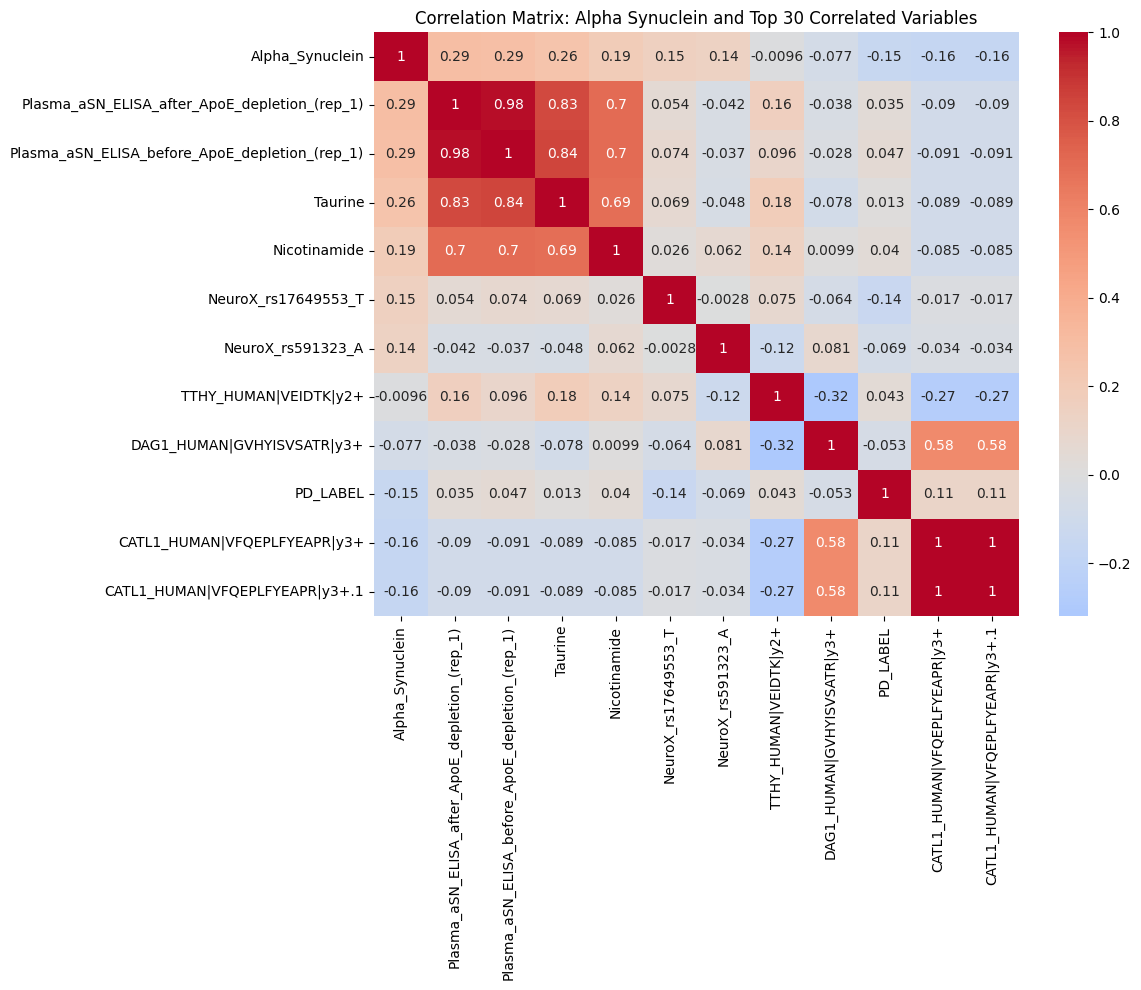

In [120]:
#Correlation Matrix for Alpha-Synuclein

# Load dataset

df = pd.read_excel("AS_Correlation_Markers.xlsx")

# Clean column names (remove spaces, standardize)
df.columns = df.columns.str.strip()

# Identify target variable
target = "Alpha_Synuclein"

# Ensure the target exists (case-insensitive check)
matching_cols = [col for col in df.columns if col.lower().strip() == target.lower()]
if matching_cols:
    target = matching_cols[0]
else:
    raise ValueError("Target variable 'alpha synuclein' not found in the dataset.")

# Compute correlations with target variable
corr_series = df.corr(numeric_only=True)[target].dropna().sort_values(ascending=False)

# Exclude the target itself and select top 30 correlated variables
top_corr_vars = corr_series.drop(target, errors="ignore").head(15).index.tolist()

# Create correlation matrix for the target + top correlated variables
corr_matrix = df[[target] + top_corr_vars].corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix: Alpha Synuclein and Top 30 Correlated Variables")
plt.tight_layout()

corr_matrix.head()

,PD_LABEL,Homovanillic_acid,N-Acetylputrescine,3-Hydroxykynurenine,Ornithine,AACT_HUMAN|NLAVSQVVHK|y8+,Putrescine,AACT_HUMAN|ADLSGITGAR|y7+,AACT_HUMAN|EIGELYLPK|y2+,AACT_HUMAN|EIGELYLPK|y7+,"7a-Hydroxy-3-oxocholest-4-enoic_acid+3b,_7a-dihydroxycholest-5-enoic_acid",AACT_HUMAN|ADLSGITGAR|y6+,SAMP_HUMAN|IVLGQEQDSYGGK|y3+,AACT_HUMAN|NLAVSQVVHK|b3+,ANT3_HUMAN|DDLYVSDAFHK|y7+,LYSC_HUMAN|WESGYNTR|y7+
PD_LABEL,1.000000,0.360363,0.283996,0.264560,0.262323,0.261115,0.256090,0.252592,0.251256,0.250894,0.247083,0.242436,0.241867,0.241268,0.239586,0.233925
Homovanillic_acid,0.360363,1.000000,0.317905,0.233288,0.166121,0.297038,0.209537,0.320669,0.308347,0.303943,0.068748,0.322701,0.207521,0.311195,0.305193,0.255486
N-Acetylputrescine,0.283996,0.317905,1.000000,0.047454,-0.007315,0.034343,0.374800,0.031641,0.029452,0.028947,-0.062219,0.026993,0.006306,0.019773,-0.026195,0.092924
3-Hydroxykynurenine,0.264560,0.233288,0.047454,1.000000,0.289613,0.306197,-0.123391,0.305070,0.303930,0.294446,0.312453,0.281251,0.116518,0.313107,0.217616,0.351851
Ornithine,0.262323,0.166121,-0.007315,0.289613,1.000000,0.131286,0.153867,0.131233,0.133825,0.126519,0.257520,0.118482,0.090000,0.141071,0.099461,0.228308


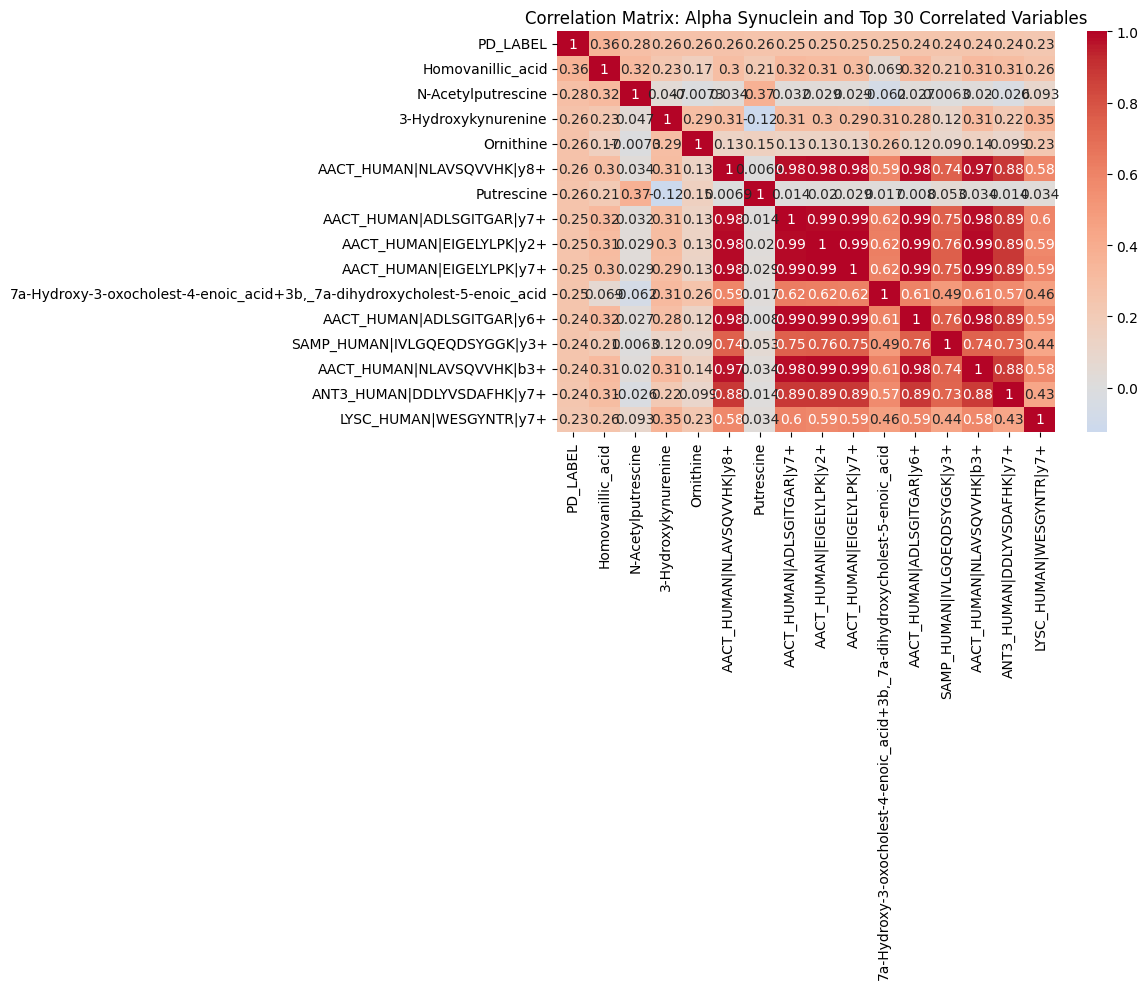

In [121]:
#Correlation Matrix for PD_LABEL using Bio_DF

# Load dataset

df = BIO_df = pd.read_csv("filtered_BIO_pivot_df.csv")

# Clean column names (remove spaces, standardize)
df.columns = df.columns.str.strip()

# Identify target variable
target = "PD_LABEL"

# Ensure the target exists (case-insensitive check)
matching_cols = [col for col in df.columns if col.lower().strip() == target.lower()]
if matching_cols:
    target = matching_cols[0]
else:
    raise ValueError("Target variable 'alpha synuclein' not found in the dataset.")

# Compute correlations with target variable
corr_series = df.corr(numeric_only=True)[target].dropna().sort_values(ascending=False)

# Exclude the target itself and select top 30 correlated variables
top_corr_vars = corr_series.drop(target, errors="ignore").head(15).index.tolist()

# Create correlation matrix for the target + top correlated variables
corr_matrix = df[[target] + top_corr_vars].corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix: Alpha Synuclein and Top 30 Correlated Variables")
plt.tight_layout()

corr_matrix.head()

,Alpha_Synuclein,Taurine,Nicotinamide,TTHY_HUMAN|VEIDTK|y4+,TRFE_HUMAN|HSTIFENLANK|y5+,Serotonin,HBB_HUMAN|VNVDEVGGEALGR|y3+,HBA_HUMAN|TYFPHFDLSHGSAQVK|y3+,HBA_HUMAN|TYFPHFDLSHGSAQVK|b2+,HBB_HUMAN|SAVTALWGK|y7+,HBB_HUMAN|SAVTALWGK|y3+,HBB_HUMAN|VNVDEVGGEALGR|y7+,HBA_HUMAN|FLASVSTVLTSK|y7+,FIBB_HUMAN|AHYGGFTVQNEANK|b3+,CAD13_HUMAN|INENTGSVSVTR|y4+,HBB_HUMAN|EFTPPVQAAYQK|y8+
Alpha_Synuclein,1.000000,0.255522,0.192585,0.151299,0.128439,0.120282,0.113270,0.113138,0.112847,0.111686,0.111673,0.111368,0.110496,0.109964,0.109307,0.109089
Taurine,0.255522,1.000000,0.686459,0.027226,0.127296,0.659038,0.098043,0.098191,0.098297,0.098308,0.097610,0.098187,0.100907,0.080949,-0.058441,0.099577
Nicotinamide,0.192585,0.686459,1.000000,0.034490,0.157393,0.461748,0.076144,0.074556,0.076682,0.077505,0.076047,0.077303,0.085006,0.104498,-0.013303,0.083586
TTHY_HUMAN|VEIDTK|y4+,0.151299,0.027226,0.034490,1.000000,-0.049084,0.097543,-0.057808,-0.060729,-0.056774,-0.055445,-0.057741,-0.055577,-0.040010,0.021035,-0.135899,-0.043930
TRFE_HUMAN|HSTIFENLANK|y5+,0.128439,0.127296,0.157393,-0.049084,1.000000,-0.007468,0.019459,0.017337,0.019952,0.020551,0.018753,0.020121,0.032469,0.104707,0.079658,0.028793


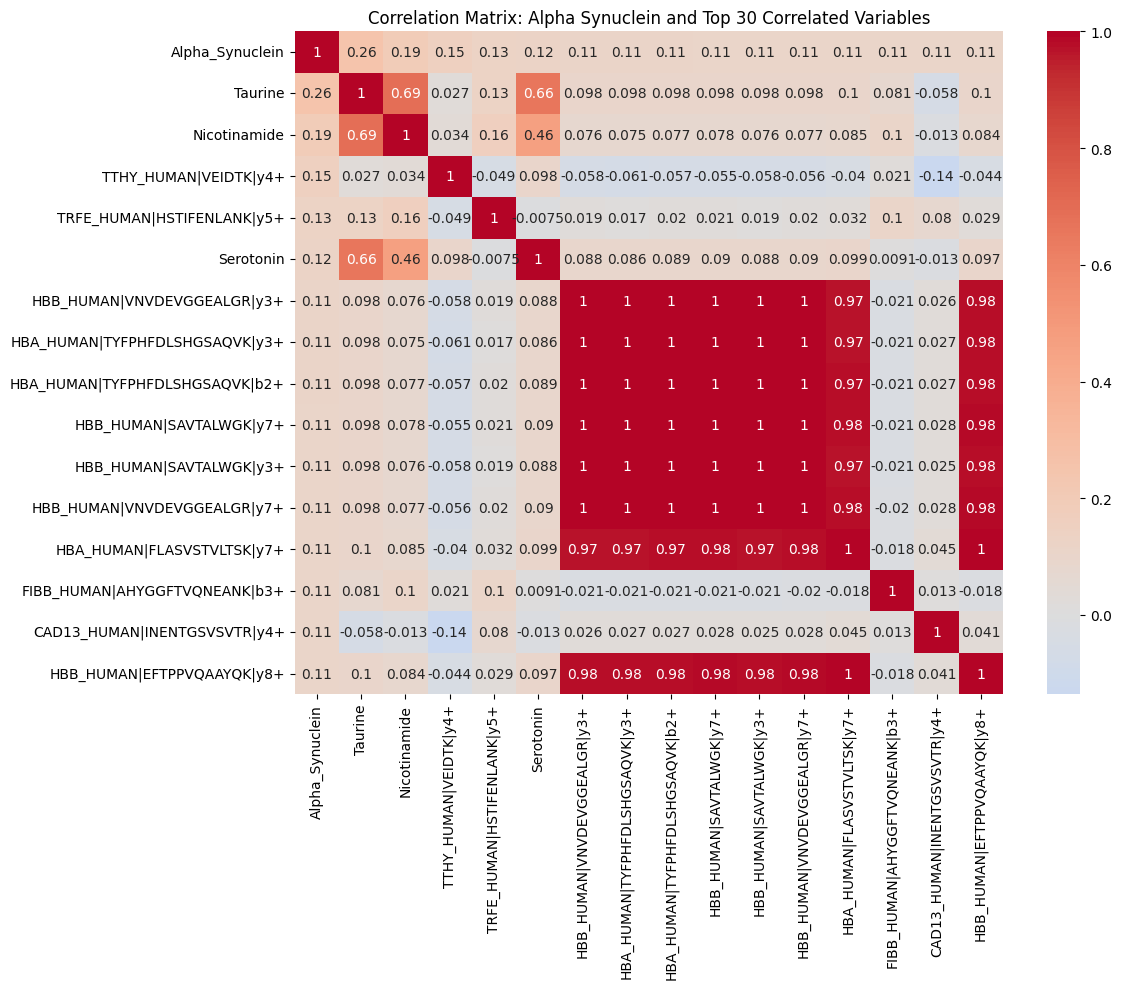

In [122]:
#Correlation Matrix for Alpha Synuclein using Bio_DF

# Load dataset

df = BIO_df = pd.read_csv("filtered_BIO_pivot_df.csv")

# Clean column names (remove spaces, standardize)
df.columns = df.columns.str.strip()

# Identify target variable
target = "Alpha_Synuclein"

# Ensure the target exists (case-insensitive check)
matching_cols = [col for col in df.columns if col.lower().strip() == target.lower()]
if matching_cols:
    target = matching_cols[0]
else:
    raise ValueError("Target variable 'alpha synuclein' not found in the dataset.")

# Compute correlations with target variable
corr_series = df.corr(numeric_only=True)[target].dropna().sort_values(ascending=False)

# Exclude the target itself and select top 30 correlated variables
top_corr_vars = corr_series.drop(target, errors="ignore").head(15).index.tolist()

# Create correlation matrix for the target + top correlated variables
corr_matrix = df[[target] + top_corr_vars].corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix: Alpha Synuclein and Top 30 Correlated Variables")
plt.tight_layout()

corr_matrix.head()

In [123]:
# ======================================
#  Evaluate Top N Features + Stability + Threshold Calibration Export
# ======================================

def evaluate_topN_with_stability_and_thresholds(X, y, top_n_list=[30, 10, 5],
                                                model_type="xgb", prefix="xgb"):
    """
    Cross-validation evaluation with:
    - In-fold top-N feature selection using XGBoost
    - Per-fold threshold derivation (balanced accuracy)
    - Logistic calibration on threshold rule scores
    - CSV export for feature stability + consensus thresholds

    model_type: 'rf' or 'xgb'
    """
    from sklearn.model_selection import StratifiedKFold
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score, roc_auc_score, balanced_accuracy_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from xgboost import XGBClassifier
    import pandas as pd, numpy as np, os
    from collections import Counter

    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    os.makedirs("feature_stability", exist_ok=True)
    os.makedirs("thresholds", exist_ok=True)

    results, feature_counts = {}, {}
    for n in top_n_list:
        results[n] = {"y_true": [], "y_pred": [], "y_prob": []}
        feature_counts[n] = Counter()

    all_thresholds = []

    for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # ---- In-fold feature selection (XGB) ----
        xgb_selector = XGBClassifier(eval_metric="logloss", random_state=42)
        xgb_selector.fit(X_train, y_train)
        importances = pd.Series(xgb_selector.feature_importances_, index=X_train.columns).sort_values(ascending=False)

        for n in top_n_list:
            selected = importances.head(n).index
            feature_counts[n].update(selected)

            X_train_sub, X_test_sub = X_train[selected], X_test[selected]
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train_sub)
            X_test_scaled = scaler.transform(X_test_sub)

            if model_type == "rf":
                model = RandomForestClassifier(n_estimators=100, random_state=42)
            else:
                model = XGBClassifier(eval_metric="logloss", random_state=42,
                                      n_estimators=50, max_depth=3, verbosity=0)

            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            y_prob = model.predict_proba(X_test_scaled)[:, 1]

            results[n]["y_true"].extend(y_test)
            results[n]["y_pred"].extend(y_pred)
            results[n]["y_prob"].extend(y_prob)

            # ---- Derive balanced thresholds on training fold ----
            thresholds_fold = []
            feat_imp = pd.Series(model.feature_importances_, index=selected)
            weights = feat_imp / feat_imp.max()

            for feat in selected:
                vals = X_train_sub[feat].values
                yvals = y_train.values
                best_th, best_score, best_dir = None, 0, ">"
                for direction in [">", "<"]:
                    for t in np.linspace(np.percentile(vals, 2), np.percentile(vals, 98), 150):
                        preds = (vals > t).astype(int) if direction == ">" else (vals < t).astype(int)
                        bal = balanced_accuracy_score(yvals, preds)
                        if bal > best_score:
                            best_th, best_score, best_dir = t, bal, direction
                thresholds_fold.append({
                    "fold": fold,
                    "top_n": n,
                    "biomarker": feat,
                    "direction": best_dir,
                    "threshold": round(best_th, 5),
                    "weight": round(weights[feat], 4)
                })
            all_thresholds.extend(thresholds_fold)

            # ---- Calibrate rule score on training fold ----
            def compute_rule_score(X_df, th_table):
                scores = []
                for _, row in X_df.iterrows():
                    hits, total_w = 0.0, 0.0
                    for _, r in th_table.iterrows():
                        val = row[r.biomarker]
                        hit = (val > r.threshold) if r.direction == ">" else (val < r.threshold)
                        w = r.weight or 1.0
                        hits += w * hit
                        total_w += w
                    scores.append(hits / max(total_w, 1e-9))
                return np.array(scores)

            th_df_fold = pd.DataFrame(thresholds_fold)
            rule_scores_train = compute_rule_score(X_train_sub, th_df_fold)
            logit = LogisticRegression()
            logit.fit(rule_scores_train.reshape(-1, 1), y_train)
            a, b = float(logit.coef_[0][0]), float(logit.intercept_[0])
            th_df_fold["a"] = a
            th_df_fold["b"] = b

            th_path = f"thresholds/{prefix}_fold{fold}_top{n}_thresholds.csv"
            th_df_fold.to_csv(th_path, index=False)

    # ---- Summary metrics ----
    summary = {}
    for n, r in results.items():
        acc = accuracy_score(r["y_true"], r["y_pred"])
        auc = roc_auc_score(r["y_true"], r["y_prob"])
        summary[n] = {"Accuracy": acc, "AUC": auc}
    summary_df = pd.DataFrame(summary).T

    # ---- Feature stability export ----
    stability = {}
    for n, counter in feature_counts.items():
        stability_df = pd.DataFrame(counter.most_common(), columns=["Feature", "Count"])
        stability_df["Frequency"] = stability_df["Count"] / kf.get_n_splits()
        stability[n] = stability_df
        csv_path = f"feature_stability/{prefix}_stability_top{n}.csv"
        stability_df.to_csv(csv_path, index=False)

    # ---- Consensus thresholds ----
    all_thresholds_df = pd.DataFrame(all_thresholds)
    consensus = (
        all_thresholds_df.groupby(["top_n", "biomarker", "direction"])["threshold", "weight"]
        .mean().reset_index()
    )
    consensus.to_csv(f"thresholds/{prefix}_consensus_thresholds.csv", index=False)
    print(f"✅ Consensus thresholds saved → thresholds/{prefix}_consensus_thresholds.csv")

    return summary_df, stability, consensus


### Thresholds for XGB Features

In [124]:
# ======================================
# XGBoost Feature Selection & Classification Thresholds
# ======================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix
import os

# -----------------------------
# 1. Helper to compute optimal threshold (Youden J)
# -----------------------------
def compute_optimal_threshold(y_true, y_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    j = tpr - fpr
    j_idx = np.argmax(j)
    return thresholds[j_idx], fpr, tpr, auc(fpr, tpr)

# -----------------------------
# 2. Train model, rank features, evaluate subset
# -----------------------------
def train_and_evaluate_subset(X, y, top_n, output_prefix="xgb"):
    model = XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.9,
        colsample_bytree=0.9,
        eval_metric="logloss",
        random_state=42,
        use_label_encoder=False
    )
    model.fit(X, y)

    # Get feature importances by weight
    booster = model.get_booster()
    imp_map = booster.get_score(importance_type="weight")
    feature_importance = pd.DataFrame({
        "Feature": list(imp_map.keys()),
        "Weight": list(imp_map.values())
    }).sort_values("Weight", ascending=False)

    # Select top N features
    top_features = feature_importance.head(top_n)
    feats = top_features["Feature"].tolist()

    # Retrain model on top-N subset
    model.fit(X[feats], y)
    y_prob = model.predict_proba(X[feats])[:, 1]

    # Compute threshold and performance
    thr, fpr, tpr, roc_auc = compute_optimal_threshold(y, y_prob)
    y_pred = (y_prob >= thr).astype(int)

    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    sens = tp / (tp + fn)
    spec = tn / (tn + fp)
    ppv = tp / (tp + fp)
    npv = tn / (tn + fn)

    # Add threshold column to the top-features table
    top_features["Optimal_Threshold"] = thr
    csv_name = f"{output_prefix}_top{top_n}_features.csv"
    top_features.to_csv(csv_name, index=False)
    print(f"✅ Saved {csv_name}")

    # ---- Plot ROC curve ----
    plt.figure()
    plt.plot(fpr, tpr, lw=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"ROC Curve (Top {top_n} Features)\nAUC = {roc_auc:.3f}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    # ---- Plot probability distribution ----
    plt.figure()
    plt.hist(y_prob, bins=30, alpha=0.7)
    plt.axvline(thr, color='red', linestyle='--', linewidth=2)
    plt.title(f"Predicted Probability Distribution (Top {top_n} Features)\nThreshold = {thr:.3f}")
    plt.xlabel("Predicted Probability (PD Positive)")
    plt.ylabel("Count")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    metrics = {
        "Top_N": top_n,
        "Optimal_Threshold": thr,
        "AUC": roc_auc,
        "Sensitivity (TPR)": sens,
        "Specificity (TNR)": spec,
        "PPV": ppv,
        "NPV": npv,
        "Num_Features": len(feats)
    }
    return metrics

# -----------------------------
# 3. Main execution across top-N sets
# -----------------------------
def evaluate_topN_feature_sets(X, y, prefix="xgb"):
    results = []
    for n in [5, 10, 30]:
        m = train_and_evaluate_subset(X, y, top_n=n, output_prefix=prefix)
        results.append(m)

    summary = pd.DataFrame(results)
    summary_file = f"{prefix}_thresholds_summary.csv"
    summary.to_csv(summary_file, index=False)
    print(f"\n✅ Saved threshold summary: {summary_file}")
    print(summary)

# -----------------------------

# df = pd.read_csv("filtered_gene_data.csv")
# X = df.drop("PD_Value", axis=1)
# y = df["PD_Value"]
# evaluate_topN_feature_sets(X, y, prefix="pd_model")


In [131]:
# ======================================
#  Consensus Biomarker Stability Table
# ======================================

import pandas as pd
import os

def generate_consensus_table(folder="feature_stability", top_n_list=[10, 5]):
    """
    Merge RandomForest and XGBoost stability CSVs and identify consensus biomarkers.
    """
    consensus_results = {}

    for n in top_n_list:
        rf_path = os.path.join(folder, f"rf_stability_top{n}.csv")
        xgb_path = os.path.join(folder, f"xgb_stability_top{n}.csv")

        if not (os.path.exists(rf_path) and os.path.exists(xgb_path)):
            print(f"Missing stability files for top {n}, skipping...")
            continue

        rf_df = pd.read_csv(rf_path)
        xgb_df = pd.read_csv(xgb_path)

        # Merge on Feature
        merged = pd.merge(rf_df, xgb_df, on="Feature", suffixes=("_RF", "_XGB"))
        merged["Mean_Frequency"] = merged[["Frequency_RF", "Frequency_XGB"]].mean(axis=1)
        merged["Frequency_Diff"] = (merged["Frequency_RF"] - merged["Frequency_XGB"]).abs()

        # Rank consensus features by mean stability
        merged = merged.sort_values("Mean_Frequency", ascending=False)
        consensus_results[n] = merged

        # Save to CSV
        consensus_csv = os.path.join(folder, f"consensus_biomarkers_top{n}.csv")
        merged.to_csv(consensus_csv, index=False)
        print(f"✅ Consensus biomarker table saved: {consensus_csv}")

    return consensus_results


# ---- Run and display consensus tables ----
consensus_tables = generate_consensus_table(folder="feature_stability", top_n_list=[10, 5])

for n, df in consensus_tables.items():
    print(f"\nTop {n} Consensus Biomarkers (RF ∩ XGBoost):")
    display(df.head(10))


✅ Consensus biomarker table saved: feature_stability\consensus_biomarkers_top10.csv
✅ Consensus biomarker table saved: feature_stability\consensus_biomarkers_top5.csv

Top 10 Consensus Biomarkers (RF ∩ XGBoost):


,Feature,Count_RF,Frequency_RF,Count_XGB,Frequency_XGB,Mean_Frequency,Frequency_Diff
0,Homovanillic_acid,10,1.0,10,1.0,1.0,0.0
1,LIGO1_HUMAN|ATVPFPFDIK|y5+,8,0.8,8,0.8,0.8,0.0
2,CCKN_HUMAN|AHLGALLAR|y6+,7,0.7,7,0.7,0.7,0.0
3,24(S)-hydroxycholesterol,3,0.3,3,0.3,0.3,0.0
4,SLIK1_HUMAN|SLPVDVFAGVSLSK|y8+,3,0.3,3,0.3,0.3,0.0
9,LIGO1_HUMAN|ATVPFPFDIK|y7+,2,0.2,2,0.2,0.2,0.0
13,GD3_(rep2),2,0.2,2,0.2,0.2,0.0
11,A4_HUMAN|LVFFAEDVGSNK|y9+,2,0.2,2,0.2,0.2,0.0
10,TTHY_HUMAN|VEIDTK|y4+,2,0.2,2,0.2,0.2,0.0
12,Cysteine,2,0.2,2,0.2,0.2,0.0



Top 5 Consensus Biomarkers (RF ∩ XGBoost):


,Feature,Count_RF,Frequency_RF,Count_XGB,Frequency_XGB,Mean_Frequency,Frequency_Diff
0,Homovanillic_acid,8,0.8,8,0.8,0.8,0.0
1,LIGO1_HUMAN|ATVPFPFDIK|y5+,6,0.6,6,0.6,0.6,0.0
2,CCKN_HUMAN|AHLGALLAR|y6+,4,0.4,4,0.4,0.4,0.0
3,CBLN1_HUMAN|STFIAPR|y3+,2,0.2,2,0.2,0.2,0.0
4,Cysteine,2,0.2,2,0.2,0.2,0.0
25,CLUS_HUMAN|IDSLLENDR|y5+,1,0.1,1,0.1,0.1,0.0
21,CO4B_HUMAN|GLEEELQFSLGSK|y6+,1,0.1,1,0.1,0.1,0.0
22,CYTM_HUMAN|DLSPDDPQVQK|b3+,1,0.1,1,0.1,0.1,0.0
23,24(S)-hydroxycholesterol,1,0.1,1,0.1,0.1,0.0
24,PARK7_HUMAN|DGLILTSR|y3+,1,0.1,1,0.1,0.1,0.0


In [134]:
# ============================================
#   Compute Thresholds for Top 30 Stable Biomarkers + Correct Weights
# ============================================

import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve
import joblib

# ---- Load Data ----
df = pd.read_csv("filtered_BIO_pivot_df.csv")
assert "PD_LABEL" in df.columns, "Missing PD_LABEL column in dataset."
y = df["PD_LABEL"].astype(int).values

# ---- Combine All Consensus Tables ----
all_features = pd.concat([
    d[["Feature", "Mean_Frequency"]] for d in consensus_tables.values()
])

# Deduplicate and average Mean_Frequency
all_features = (
    all_features.groupby("Feature", as_index=False)
    .agg({"Mean_Frequency": "mean"})
    .sort_values("Mean_Frequency", ascending=False)
)

# Select top 30 most stable
top30_features = all_features.head(30)["Feature"].tolist()
print(f"✅ Selected {len(top30_features)} top consensus-stable biomarkers.")

# ---- Compute Youden J Thresholds ----
rows = []
for f in top30_features:
    if f not in df.columns:
        print(f"⚠️ Skipping {f}: not found in dataset.")
        continue

    x = df[f].values
    m = ~np.isnan(x)
    xv, yv = x[m], y[m]
    if len(np.unique(yv)) < 2:
        thr_star, direction = np.nan, ">"
    else:
        fpr, tpr, thr = roc_curve(yv, xv)
        j = tpr - fpr
        idx = int(np.argmax(j))
        thr_star = float(thr[idx]) if idx < len(thr) else np.nan
        direction = ">" if np.nanmean(xv[yv==1]) >= np.nanmean(xv[yv==0]) else "<"
    rows.append({"biomarker": f, "direction": direction, "threshold": thr_star})

th_df = pd.DataFrame(rows)
th_df = th_df.merge(all_features, left_on="biomarker", right_on="Feature", how="left")
th_df.drop(columns=["Feature"], inplace=True)

# ---- Robust Weight Mapping from Model ----
try:
    xgb_model = joblib.load("pd_model.pkl")
    importances = np.asarray(xgb_model.feature_importances_, dtype=float)
    
    # Try to fetch training features
    model_feats = getattr(xgb_model, "feature_names_in_", None)
    if model_feats is None:
        booster = getattr(xgb_model, "get_booster", lambda: None)()
        model_feats = getattr(booster, "feature_names", None)

    if model_feats is None:
        print("⚠️ Could not detect model feature names; using correlation fallback.")
        raise ValueError

    # Map model feature importances into dictionary
    imp_map = {str(model_feats[i]).strip(): importances[i] for i in range(len(model_feats))}

    # Align using best-effort match (exact or partial)
    weights = []
    for f in th_df["biomarker"]:
        # exact match
        if f in imp_map:
            w = imp_map[f]
        else:
            # fallback partial match (use longest overlap)
            candidates = [k for k in imp_map.keys() if f in k or k in f]
            w = imp_map[candidates[0]] if candidates else 0.0
        weights.append(w)

    # Normalize weights to sum to 1
    weights = np.array(weights, dtype=float)
    weights = weights / (weights.sum() + 1e-12)
    th_df["weight"] = weights

except Exception as e:
    print("⚠️ Model alignment failed, using correlation fallback:", e)
    weights = np.array([
        abs(pd.Series(df[f]).corr(pd.Series(y))) if f in df.columns else 0.0
        for f in th_df["biomarker"]
    ])
    weights = weights / (weights.sum() + 1e-12)
    th_df["weight"] = weights

# ---- Save Final CSV ----
out_path = "thresholds_extracted.csv"
th_df.to_csv(out_path, index=False)
print(f"✅ Thresholds (with correct weights) saved to {out_path}")

# ---- Preview ----
display(th_df.head(10))


✅ Selected 30 top consensus-stable biomarkers.
⚠️ Could not detect model feature names; using correlation fallback.
⚠️ Model alignment failed, using correlation fallback: 
✅ Thresholds (with correct weights) saved to thresholds_extracted.csv


,biomarker,direction,threshold,Mean_Frequency,weight
0,Homovanillic_acid,>,64.882360,0.90,0.094636
1,LIGO1_HUMAN|ATVPFPFDIK|y5+,<,0.336500,0.70,0.054081
2,CCKN_HUMAN|AHLGALLAR|y6+,<,0.938000,0.55,0.056263
3,GD3_(rep2),>,7.975638,0.20,0.022815
4,CBLN1_HUMAN|STFIAPR|y3+,>,0.992500,0.20,0.014437
5,Cysteine,>,5.481861,0.20,0.040842
6,24(S)-hydroxycholesterol,<,7.650000,0.20,0.036225
7,SLIK1_HUMAN|SLPVDVFAGVSLSK|y8+,<,0.734500,0.20,0.021425
8,TTHY_HUMAN|VEIDTK|y4+,<,1.267600,0.20,0.025715
9,Tyrosine,>,28.741583,0.20,0.011959


In [136]:
import joblib, inspect
from xgboost import XGBClassifier

print(type(xgb_model))
print("Has feature_names_in_:", hasattr(xgb_model, "feature_names_in_"))
print("Booster feature names:", getattr(xgb_model.get_booster(), "feature_names", None))
print("X_train type:", type(X_train))

<class 'xgboost.sklearn.XGBClassifier'>
Has feature_names_in_: False
Booster feature names: None
X_train type: <class 'pandas.core.frame.DataFrame'>


In [142]:
# ============================================
#   Compute Thresholds for Top 30 Stable Biomarkers + Correct Weights
# ============================================

import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve
import joblib

# ---- Load Data ----
df = pd.read_csv("filtered_BIO_pivot_df.csv")
assert "PD_LABEL" in df.columns, "Missing PD_LABEL column in dataset."
y = df["PD_LABEL"].astype(int).values

# ---- Combine All Consensus Tables ----
all_features = pd.concat([
    d[["Feature", "Mean_Frequency"]] for d in consensus_tables.values()
])

# Deduplicate and average Mean_Frequency
all_features = (
    all_features.groupby("Feature", as_index=False)
    .agg({"Mean_Frequency": "mean"})
    .sort_values("Mean_Frequency", ascending=False)
)

# Select top 30 most stable
top30_features = all_features.head(30)["Feature"].tolist()
print(f"✅ Selected {len(top30_features)} top consensus-stable biomarkers.")

# ---- Compute Youden J Thresholds ----
rows = []
for f in top30_features:
    if f not in df.columns:
        print(f"⚠️ Skipping {f}: not found in dataset.")
        continue

    x = df[f].values
    m = ~np.isnan(x)
    xv, yv = x[m], y[m]
    if len(np.unique(yv)) < 2:
        thr_star, direction = np.nan, ">"
    else:
        fpr, tpr, thr = roc_curve(yv, xv)
        j = tpr - fpr
        idx = int(np.argmax(j))
        thr_star = float(thr[idx]) if idx < len(thr) else np.nan
        direction = ">" if np.nanmean(xv[yv==1]) >= np.nanmean(xv[yv==0]) else "<"
    rows.append({"biomarker": f, "direction": direction, "threshold": thr_star})

th_df = pd.DataFrame(rows)
th_df = th_df.merge(all_features, left_on="biomarker", right_on="Feature", how="left")
th_df.drop(columns=["Feature"], inplace=True)

# ---- Robust Weight Mapping from Model ----
try:
    xgb_model = joblib.load("pd_model.pkl")
    importances = np.asarray(xgb_model.feature_importances_, dtype=float)
    
    # Try to fetch training features
    model_feats = getattr(xgb_model, "feature_names_in_", None)
    if model_feats is None:
        booster = getattr(xgb_model, "get_booster", lambda: None)()
        model_feats = getattr(booster, "feature_names", None)

    if model_feats is None:
        print("⚠️ Could not detect model feature names; using correlation fallback.")
        raise ValueError

    # Map model feature importances into dictionary
    imp_map = {str(model_feats[i]).strip(): importances[i] for i in range(len(model_feats))}

    # Align using best-effort match (exact or partial)
    weights = []
    for f in th_df["biomarker"]:
        # exact match
        if f in imp_map:
            w = imp_map[f]
        else:
            # fallback partial match (use longest overlap)
            candidates = [k for k in imp_map.keys() if f in k or k in f]
            w = imp_map[candidates[0]] if candidates else 0.0
        weights.append(w)

    # Normalize weights to sum to 1
    weights = np.array(weights, dtype=float)
    weights = weights / (weights.sum() + 1e-12)
    th_df["weight"] = weights

except Exception as e:
    print("⚠️ Model alignment failed, using correlation fallback:", e)
    weights = np.array([
        abs(pd.Series(df[f]).corr(pd.Series(y))) if f in df.columns else 0.0
        for f in th_df["biomarker"]
    ])
    weights = weights / (weights.sum() + 1e-12)
    th_df["weight"] = weights

# ---- Save Final CSV ----
out_path = "thresholds_extracted.csv"
th_df.to_csv(out_path, index=False)
print(f"✅ Thresholds (with correct weights) saved to {out_path}")

# ---- Preview ----
display(th_df.head(10))


✅ Selected 30 top consensus-stable biomarkers.
⚠️ Could not detect model feature names; using correlation fallback.
⚠️ Model alignment failed, using correlation fallback: 
✅ Thresholds (with correct weights) saved to thresholds_extracted.csv


,biomarker,direction,threshold,Mean_Frequency,weight
0,Homovanillic_acid,>,64.882360,0.90,0.094636
1,LIGO1_HUMAN|ATVPFPFDIK|y5+,<,0.336500,0.70,0.054081
2,CCKN_HUMAN|AHLGALLAR|y6+,<,0.938000,0.55,0.056263
3,GD3_(rep2),>,7.975638,0.20,0.022815
4,CBLN1_HUMAN|STFIAPR|y3+,>,0.992500,0.20,0.014437
5,Cysteine,>,5.481861,0.20,0.040842
6,24(S)-hydroxycholesterol,<,7.650000,0.20,0.036225
7,SLIK1_HUMAN|SLPVDVFAGVSLSK|y8+,<,0.734500,0.20,0.021425
8,TTHY_HUMAN|VEIDTK|y4+,<,1.267600,0.20,0.025715
9,Tyrosine,>,28.741583,0.20,0.011959


✅ Saved: figures\consensus_biomarkers_top10.png
✅ Saved: figures\consensus_biomarkers_top10.svg


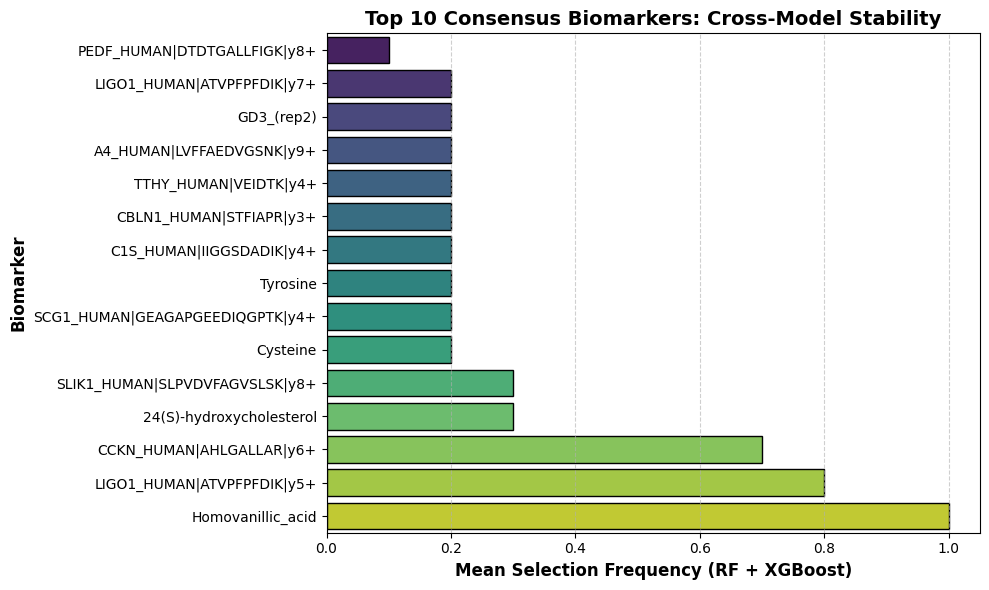

In [145]:
# ======================================
#  Consensus Biomarker Visualization (Warning-Free + Export)
# ======================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def plot_consensus_biomarkers(folder="feature_stability", top_n=10):
    """
    Create publication-ready bar and line plots for consensus biomarkers,
    remove legend warnings, and save figures as PNG/SVG.
    """
    path = os.path.join(folder, f"consensus_biomarkers_top{top_n}.csv")
    if not os.path.exists(path):
        print(f"File not found: {path}")
        return

    df = pd.read_csv(path)
    df = df.sort_values("Mean_Frequency", ascending=True)

    # Create output directory for figures
    fig_dir = "figures"
    os.makedirs(fig_dir, exist_ok=True)

   
    # --- Bar plot (mean stability) ---
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=df.tail(15),
        x="Mean_Frequency", y="Feature",
        hue="Feature",  # add dummy hue
        palette="viridis", edgecolor="black",
        legend=False  # ✅ suppress legend warning
    )
    plt.xlabel("Mean Selection Frequency (RF + XGBoost)", fontsize=12, weight="bold")
    plt.ylabel("Biomarker", fontsize=12, weight="bold")
    plt.title(f"Top {top_n} Consensus Biomarkers: Cross-Model Stability",
              fontsize=14, weight="bold")
    plt.grid(axis="x", linestyle="--", alpha=0.6)
    plt.tight_layout()

    bar_path_png = os.path.join(fig_dir, f"consensus_biomarkers_top{top_n}.png")
    bar_path_svg = os.path.join(fig_dir, f"consensus_biomarkers_top{top_n}.svg")
    plt.savefig(bar_path_png, dpi=300, bbox_inches="tight", transparent=True)
    plt.savefig(bar_path_svg, dpi=300, bbox_inches="tight", transparent=True)
    print(f"✅ Saved: {bar_path_png}")
    print(f"✅ Saved: {bar_path_svg}")
    plt.show()

# ---- Run the visualization ----
plot_consensus_biomarkers(folder="feature_stability", top_n=10)


### TOP 25 XGB Features

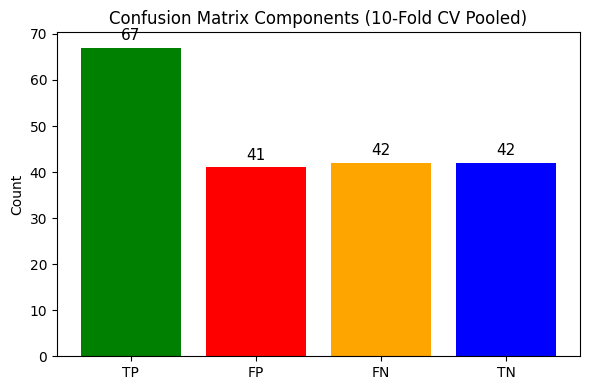

In [154]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Use pooled predictions from all folds
tn, fp, fn, tp = confusion_matrix(y_true_all_xgb, y_pred_all_xgb).ravel()

# Values and labels
labels = ["TP", "FP", "FN", "TN"]
values = [tp, fp, fn, tn]
colors = ["green", "red", "orange", "blue"]

# Plot bars
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, values, color=colors)

# Annotate bars with count
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, val + 1, str(val), ha="center", va="bottom", fontsize=11)

plt.title("Confusion Matrix Components (10-Fold CV Pooled)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


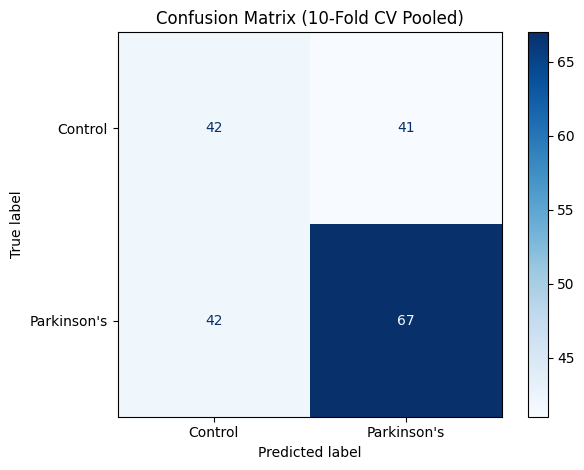

True Negatives (TN): 42
False Positives (FP): 41
False Negatives (FN): 42
True Positives (TP): 67


In [156]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_true_all_xgb, y_pred_all_xgb)

# Optional: plot as a labeled heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Control", "Parkinson's"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix (10-Fold CV Pooled)")
plt.tight_layout()
plt.show()

tn, fp, fn, tp = cm.ravel()
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")


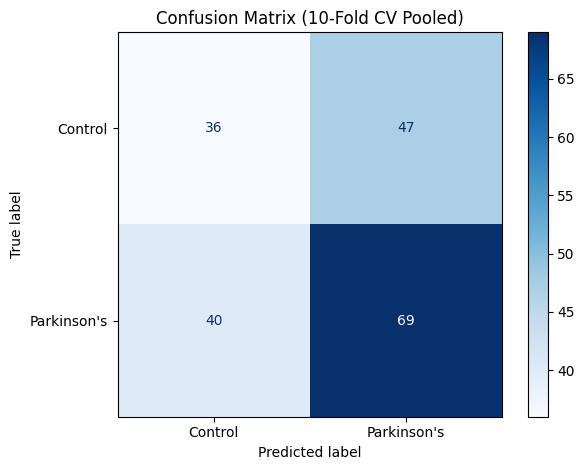

True Negatives (TN): 36
False Positives (FP): 47
False Negatives (FN): 40
True Positives (TP): 69


In [158]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_true_all_rf, y_pred_all_rf)

# Optional: plot as a labeled heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Control", "Parkinson's"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix (10-Fold CV Pooled)")
plt.tight_layout()
plt.show()

tn, fp, fn, tp = cm.ravel()
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")


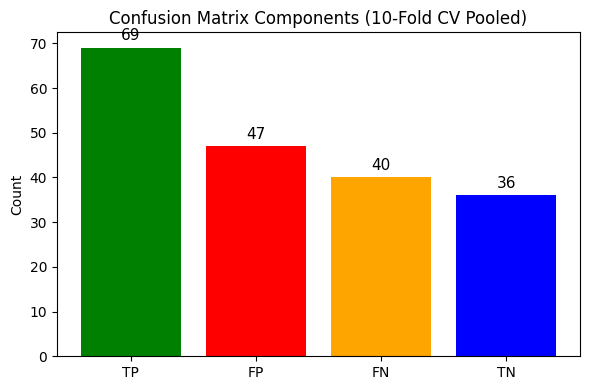

In [160]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Use pooled predictions from all folds
tn, fp, fn, tp = confusion_matrix(y_true_all_rf, y_pred_all_rf).ravel()

# Values and labels
labels = ["TP", "FP", "FN", "TN"]
values = [tp, fp, fn, tn]
colors = ["green", "red", "orange", "blue"]

# Plot bars
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, values, color=colors)

# Annotate bars with count
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, val + 1, str(val), ha="center", va="bottom", fontsize=11)

plt.title("Confusion Matrix Components (10-Fold CV Pooled)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


<a id="section-8"></a>
# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:125%;text-align:center;border-radius:10px 10px;;">8. Statistical Evaluation of Features</p>

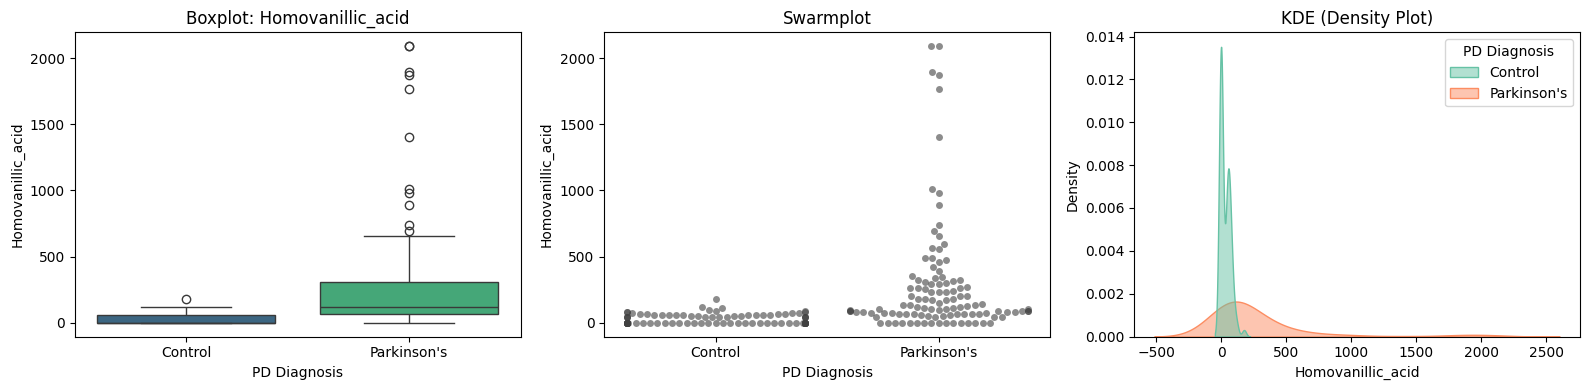

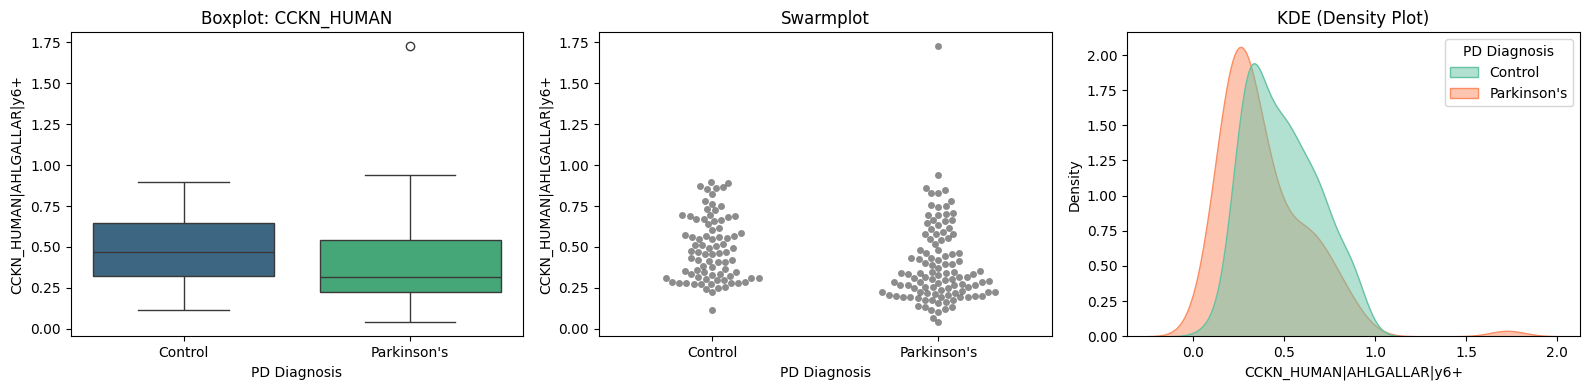

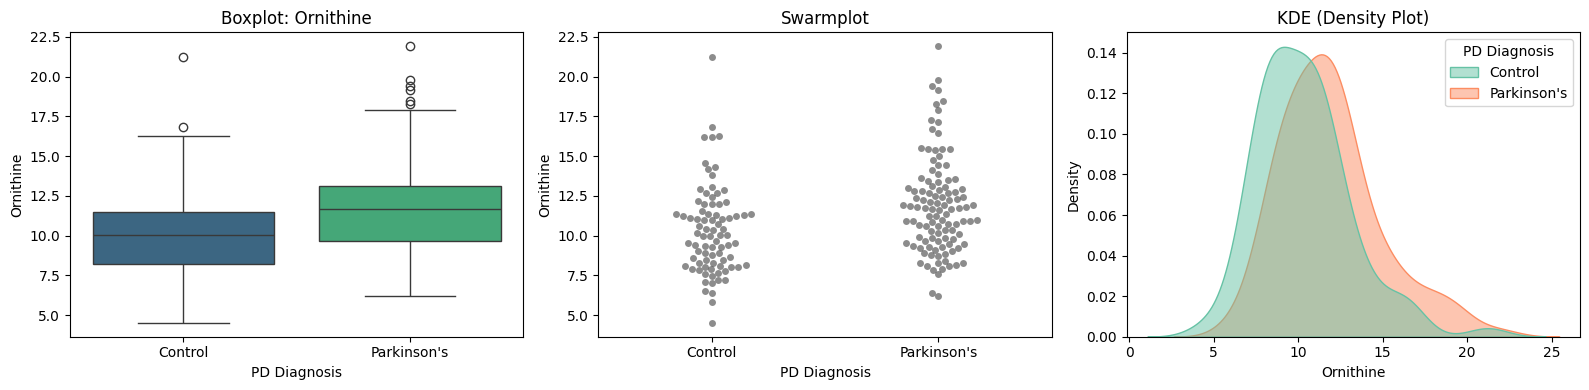

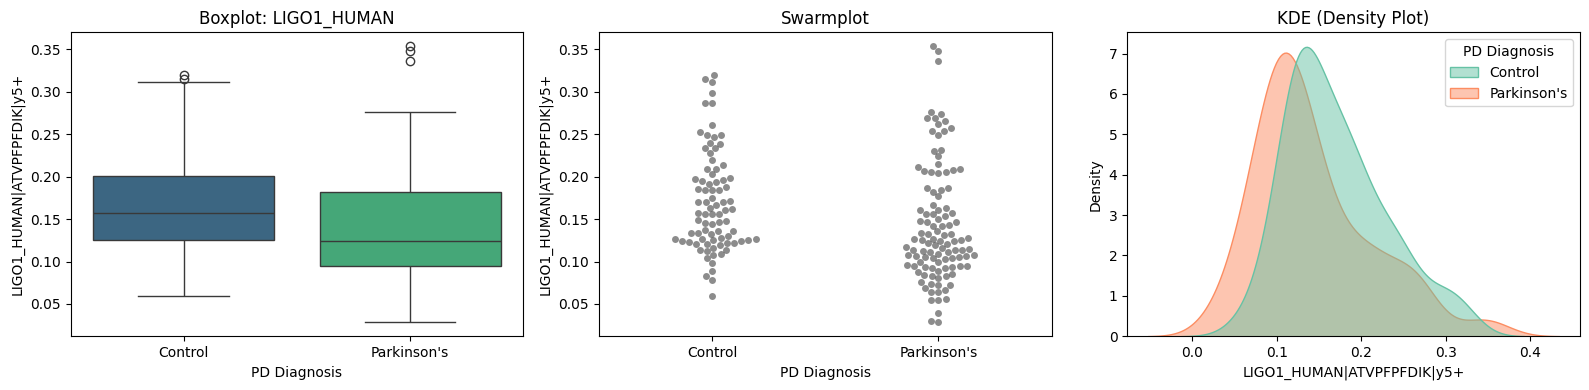

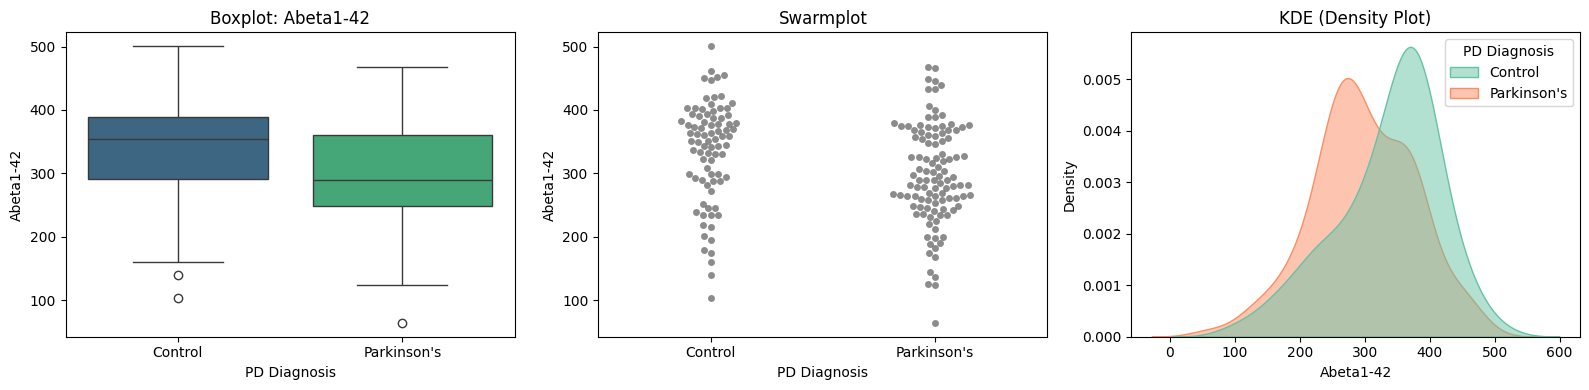

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")

# Top 5 significant biomarkers from your Mann-Whitney U test
top_proteins = [
    "Homovanillic_acid",
    "CCKN_HUMAN|AHLGALLAR|y6+",
    "Ornithine",
    "LIGO1_HUMAN|ATVPFPFDIK|y5+",
    "Abeta1-42"
]

# Optional: rename labels for better readability
BIO_df["PD Diagnosis"] = BIO_df["PD_LABEL"].map({0: "Control", 1: "Parkinson's"})

# Plot loop
for gene in top_proteins:
    plt.figure(figsize=(16, 4))  # keep this inside the loop

     # Drop rows with missing values in the current biomarker column
    plot_df = BIO_df.dropna(subset=[gene, "PD Diagnosis"])

    # Only plot if there are at least two groups with data
    if plot_df["PD Diagnosis"].nunique() < 2:
        print(f"Skipping {gene}: not enough groups with data.")
        plt.close()
        continue

    # Boxplot
    plt.subplot(1, 3, 1)
    sns.boxplot(data=BIO_df, x="PD Diagnosis", y=gene, hue="PD Diagnosis", palette="viridis", legend=False)
    plt.title(f"Boxplot: {gene.split('|')[0]}")

    # Swarmplot
    plt.subplot(1, 3, 2)
    sns.swarmplot(data=BIO_df, x="PD Diagnosis", y=gene, alpha=0.6, color=".25")
    plt.title("Swarmplot")

    # KDE plot
    plt.subplot(1, 3, 3)
    sns.kdeplot(data=BIO_df, x=gene, hue="PD Diagnosis", fill=True, common_norm=False, palette="Set2", alpha=0.5)
    plt.title("KDE (Density Plot)")

    plt.tight_layout()
    plt.show()


### Threshold Analysis for Homovanillic Acid

In [166]:
# List of percentiles to evaluate
percentiles = np.arange(0, 1.01, 0.01)  # From 0% to 100% in 1% increments

# Initialize variables to track the best threshold and performance
best_percentile = None
best_threshold = None
best_auc = 0

# Create a copy of the DataFrame to avoid modifying the original
df_copy = BIO_df.copy()

# Convert SAA_Status to numeric
BIO_df["Park_Diagnosis"] = BIO_df["PD_LABEL"].map({0: "Control", 1: "Parkinson's"})

# Loop through percentiles
for percentile in percentiles:
    threshold = df_copy['Homovanillic_acid'].quantile(percentile)
    
    # Use .loc to set Predicted_SAA_Status
    df_copy.loc[:, 'Predicted_PD_Status'] = (df_copy['Homovanillic_acid'] > threshold).astype(int)
    
    # Calculate AUC and performance metrics
    auc_score = roc_auc_score(df_copy['PD_LABEL'], df_copy['Predicted_PD_Status'])
    
    # Update the best threshold if performance improves
    if auc_score > best_auc:
        best_auc = auc_score
        best_percentile = percentile
        best_threshold = threshold

# Print the results
print(f"Best Percentile: {best_percentile * 100:.2f}%")
print(f"Best Threshold (Homovanillic Acid): {best_threshold:.3f}")
print(f"Best ROC-AUC: {best_auc:.3f}")

# Check classification report for the best threshold
df_copy.loc[:, 'Predicted_PD_Status'] = (df_copy['Homovanillic_acid'] > best_threshold).astype(int)
print("\nClassification Report:")
print(classification_report(df_copy['PD_LABEL'], df_copy['Predicted_PD_Status'], digits=3))


Best Percentile: 48.00%
Best Threshold (Homovanillic Acid): 64.525
Best ROC-AUC: 0.800

Classification Report:
              precision    recall  f1-score   support

           0      0.739     0.819     0.777        83
           1      0.850     0.780     0.813       109

    accuracy                          0.797       192
   macro avg      0.795     0.800     0.795       192
weighted avg      0.802     0.797     0.798       192



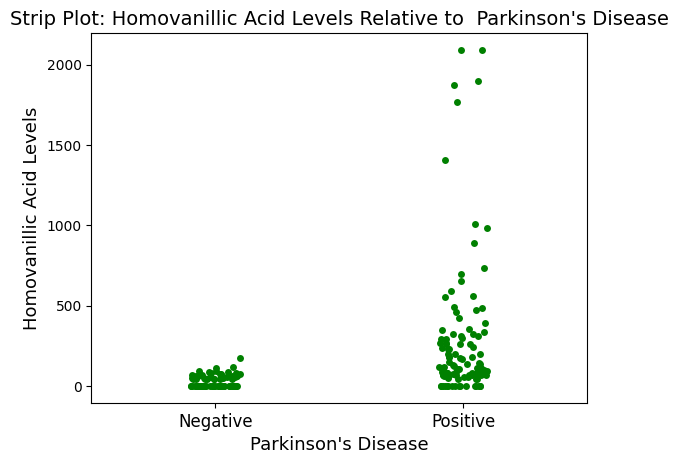

In [167]:
# Create a strip plot with filtered data
sns.stripplot(x='PD_LABEL', y='Homovanillic_acid', data=BIO_df.dropna(subset=['Homovanillic_acid']), jitter=True, color='green')

# Add labels and title
plt.xlabel("Parkinson's Disease", fontsize=13)
plt.ylabel('Homovanillic Acid Levels', fontsize=13)
plt.title("Strip Plot: Homovanillic Acid Levels Relative to  Parkinson's Disease", fontsize=14)

# Set custom labels for the x-axis
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'], fontsize=12)

plt.show()


### KDE Plots for Top 5 P-Value Biomarkers as determined by XG Boost Classifier

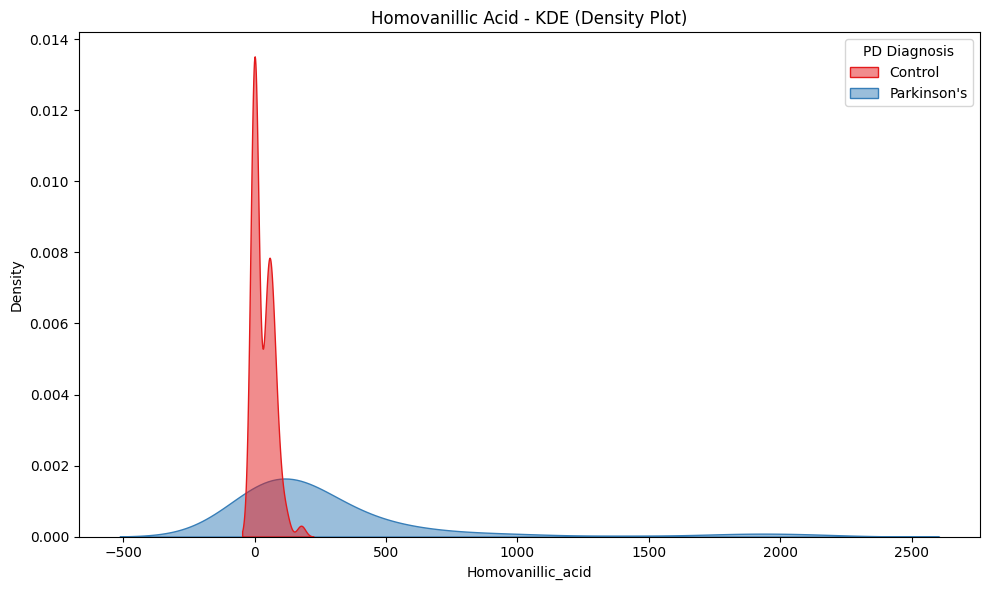

In [173]:
 # KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=BIO_df, x='Homovanillic_acid', hue="PD Diagnosis", fill=True, common_norm=False, palette="Set1", alpha=0.5)
plt.title("Homovanillic Acid - KDE (Density Plot)")

plt.tight_layout()
plt.show()

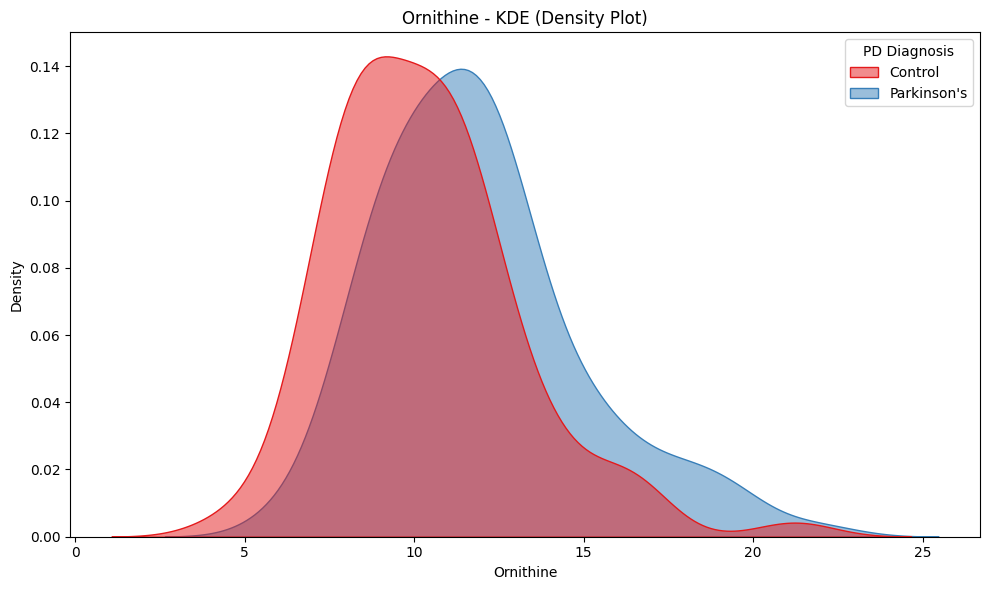

In [175]:
 # KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=BIO_df, x='Ornithine', hue="PD Diagnosis", fill=True, common_norm=False, palette="Set1", alpha=0.5)
plt.title("Ornithine - KDE (Density Plot)")

plt.tight_layout()
plt.show()

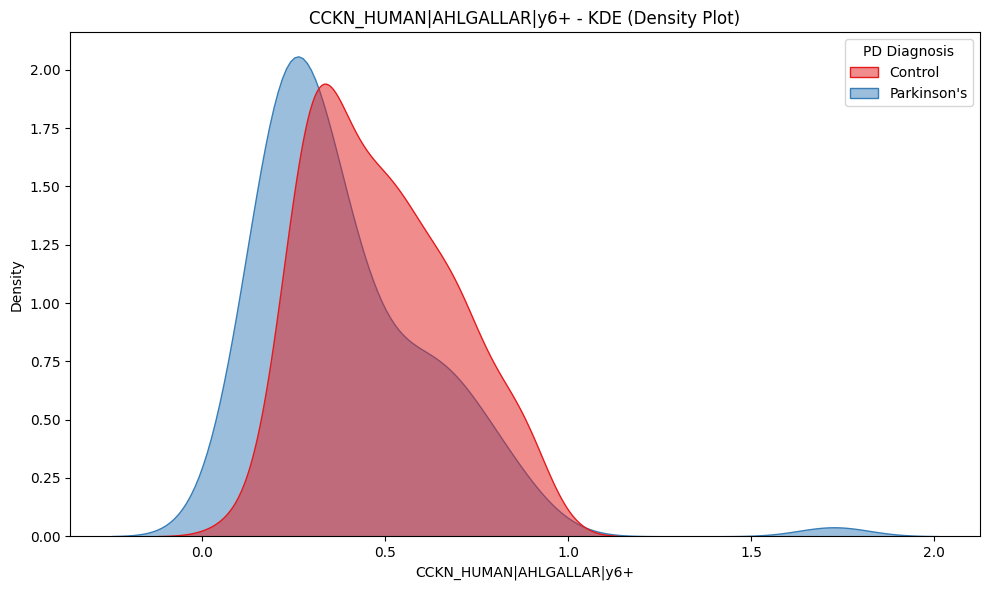

In [177]:
 # KDE plot

plt.figure(figsize=(10, 6))
sns.kdeplot(data=BIO_df, x='CCKN_HUMAN|AHLGALLAR|y6+', hue="PD Diagnosis", fill=True, common_norm=False, palette="Set1", alpha=0.5)
plt.title("CCKN_HUMAN|AHLGALLAR|y6+ - KDE (Density Plot)")

plt.tight_layout()
plt.show()

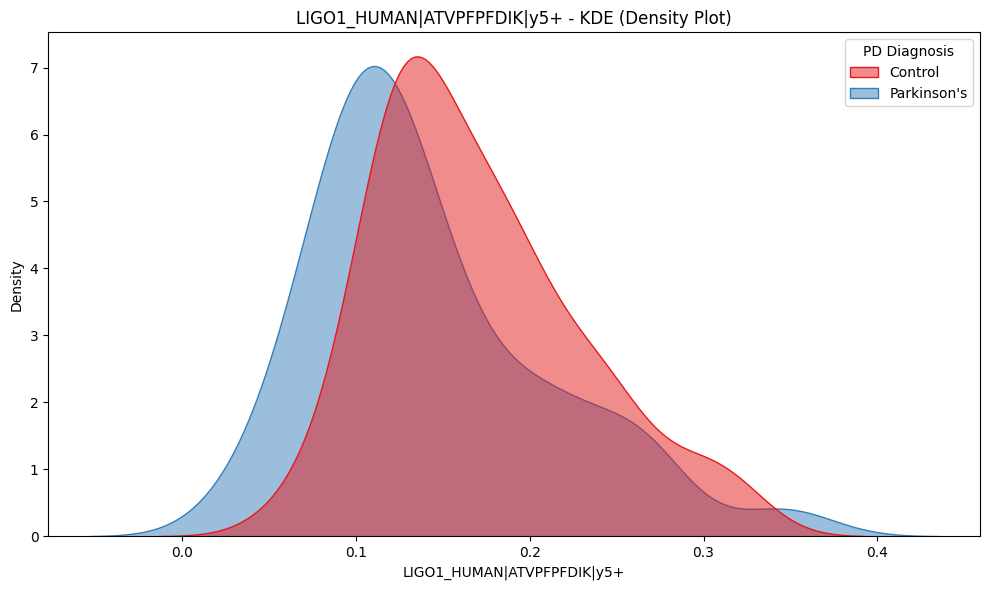

In [179]:
 # KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=BIO_df, x='LIGO1_HUMAN|ATVPFPFDIK|y5+', hue="PD Diagnosis", fill=True, common_norm=False, palette="Set1", alpha=0.5)
plt.title("LIGO1_HUMAN|ATVPFPFDIK|y5+ - KDE (Density Plot)")

plt.tight_layout()
plt.show()

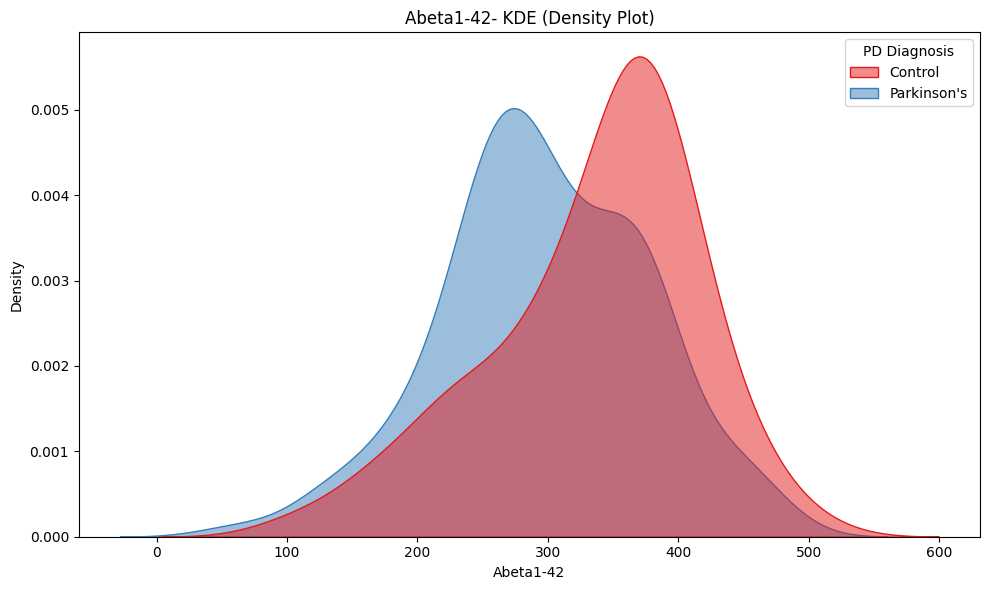

In [181]:
 # KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=BIO_df, x='Abeta1-42', hue="PD Diagnosis", fill=True, common_norm=False, palette="Set1", alpha=0.5)
plt.title("Abeta1-42- KDE (Density Plot)")

plt.tight_layout()
plt.show()

### Top Importances List XG Boost

In [184]:
BIO_df.head()

,24(S)-hydroxycholesterol,3-Hydroxykynurenine,7a-Hydroxy-3-oxocholest-4-enoic_acid,"7a-Hydroxy-3-oxocholest-4-enoic_acid+3b,_7a-dihydroxycholest-5-enoic_acid",A1AT_HUMAN|LSITGTYDLK|y6+,A1AT_HUMAN|LSITGTYDLK|y7+,A1AT_HUMAN|SVLGQLGITK|y7+,A1AT_HUMAN|SVLGQLGITK|y8+,A1BG_HUMAN|NGVAQEPVHLDSPAIK|b3+,A1BG_HUMAN|NGVAQEPVHLDSPAIK|y5+,...,VTDB_HUMAN|EFSHLGK|y5+,VTDB_HUMAN|HLSLLTTLSNR|b2+,VTDB_HUMAN|HLSLLTTLSNR|y7+,Valine,d4-5HT,hemoglobin,p-Tau,PD_LABEL,PD Diagnosis,Park_Diagnosis
0,12.67,15.00015,36.01,41.60,0.0008,0.0007,0.0009,0.0006,0.1747,0.1388,...,0.8723,1.3090,1.3211,92.416824,273.279215,13452.73,29.61,0,Control,Control
1,19.36,10.74075,80.61,82.98,0.0010,0.0008,0.0010,0.0007,0.3032,0.2869,...,0.4929,1.3220,1.2252,131.572166,241.875345,75986.90,4.30,1,Parkinson's,Parkinson's
2,14.47,22.44035,29.07,29.46,0.0005,0.0005,0.0007,0.0006,0.1203,0.0917,...,0.3291,0.3211,0.7047,118.436706,249.966309,52320.70,6.26,1,Parkinson's,Parkinson's
3,25.06,14.43905,23.29,26.38,0.0007,0.0004,0.0007,0.0011,0.0878,0.0677,...,0.2604,0.2621,0.3516,106.645881,232.547542,21113.96,36.84,1,Parkinson's,Parkinson's
4,19.76,5.87415,18.79,20.94,0.0009,0.0010,0.0009,0.0011,0.0867,0.0791,...,0.3905,0.3337,0.3175,83.725148,221.523085,26032.55,13.20,0,Control,Control


In [186]:
import xgboost as xgb

# Drop the unused column
#BIO_df.drop(columns=['PD Diagnosis'], inplace=True)

# Define features and target, keeping only numerical columns
X = BIO_df.drop(columns=['PD_LABEL']).select_dtypes(include='number')
y = BIO_df['PD_LABEL']

# Initialize and fit XGBoost classifier
clf = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
clf.fit(X, y)

# Calculate feature importances
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
cumulative_importance = importances.cumsum()

# Select top features contributing to 20% cumulative importance
top_20_features = cumulative_importance[cumulative_importance <= 0.70].index

# Create importance DataFrame
importance_df = pd.DataFrame({
    'Feature': top_20_features,
    'Importance': importances.loc[top_20_features],
})
importance_df['Percentage'] = importance_df['Importance'] * 100
importance_df['Cumulative %'] = importance_df['Percentage'].cumsum()

# Display the importance table
print(importance_df)


                                                             Feature  \
LIGO1_HUMAN|ATVPFPFDIK|y5+                LIGO1_HUMAN|ATVPFPFDIK|y5+   
CBLN1_HUMAN|STFIAPR|y3+                      CBLN1_HUMAN|STFIAPR|y3+   
NPTXR_HUMAN|LVEAFGGATK|y5+                NPTXR_HUMAN|LVEAFGGATK|y5+   
Homovanillic_acid                                  Homovanillic_acid   
Glucose                                                      Glucose   
FIBG_HUMAN|YLQEIYNSNNQK|b4+              FIBG_HUMAN|YLQEIYNSNNQK|b4+   
24(S)-hydroxycholesterol                    24(S)-hydroxycholesterol   
Ornithine                                                  Ornithine   
APOL1_HUMAN|VAQELEEK|b6+                    APOL1_HUMAN|VAQELEEK|b6+   
CCKN_HUMAN|AHLGALLAR|y6+                    CCKN_HUMAN|AHLGALLAR|y6+   
C1S_HUMAN|SNALDIIFQTDLTGQK|y7+        C1S_HUMAN|SNALDIIFQTDLTGQK|y7+   
SLIK1_HUMAN|SLPVDVFAGVSLSK|y8+        SLIK1_HUMAN|SLPVDVFAGVSLSK|y8+   
SODC_HUMAN|HVGDLGNVTADK|y3+              SODC_HUMAN|HVGDLGNVTADK

In [187]:



# Define features and target, keeping only numerical columns
X = BIO_df.drop(columns=['PD_LABEL']).select_dtypes(include='number')
y = BIO_df['PD_LABEL']


# Initialize and fit XGBoost classifier
clf = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
clf.fit(X, y)

# Calculate feature importances
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
cumulative_importance = importances.cumsum()

# Select top features contributing to 20% cumulative importance
top_20_features = cumulative_importance[cumulative_importance <= 0.70].index

# Create importance DataFrame
importance_df = pd.DataFrame({
    'Feature': top_20_features,
    'Importance': importances.loc[top_20_features],
})
importance_df['Percentage'] = importance_df['Importance'] * 100
importance_df['Cumulative %'] = importance_df['Percentage'].cumsum()

# Display the importance table
print(importance_df)


                                                             Feature  \
LIGO1_HUMAN|ATVPFPFDIK|y5+                LIGO1_HUMAN|ATVPFPFDIK|y5+   
CBLN1_HUMAN|STFIAPR|y3+                      CBLN1_HUMAN|STFIAPR|y3+   
NPTXR_HUMAN|LVEAFGGATK|y5+                NPTXR_HUMAN|LVEAFGGATK|y5+   
Homovanillic_acid                                  Homovanillic_acid   
Glucose                                                      Glucose   
FIBG_HUMAN|YLQEIYNSNNQK|b4+              FIBG_HUMAN|YLQEIYNSNNQK|b4+   
24(S)-hydroxycholesterol                    24(S)-hydroxycholesterol   
Ornithine                                                  Ornithine   
APOL1_HUMAN|VAQELEEK|b6+                    APOL1_HUMAN|VAQELEEK|b6+   
CCKN_HUMAN|AHLGALLAR|y6+                    CCKN_HUMAN|AHLGALLAR|y6+   
C1S_HUMAN|SNALDIIFQTDLTGQK|y7+        C1S_HUMAN|SNALDIIFQTDLTGQK|y7+   
SLIK1_HUMAN|SLPVDVFAGVSLSK|y8+        SLIK1_HUMAN|SLPVDVFAGVSLSK|y8+   
SODC_HUMAN|HVGDLGNVTADK|y3+              SODC_HUMAN|HVGDLGNVTADK

### Top Importances for Random Forest Classifier

In [191]:

# Define features and target, keeping only numerical columns
X = BIO_df.drop(columns=['PD_LABEL']).select_dtypes(include='number')
y = BIO_df['PD_LABEL']


from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)

# Calculate importances
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
cumulative_importance = importances.cumsum()

# Select top features contributing to 80% cumulative importance
top_30_features = cumulative_importance[cumulative_importance <= 0.80].index

# Create importance DataFrame
importance_df = pd.DataFrame({
    'Feature': top_30_features,
    'Importance': importances.loc[top_30_features],
})
importance_df['Percentage'] = importance_df['Importance'] * 100
importance_df['Cumulative %'] = importance_df['Percentage'].cumsum()

# Display table
print(importance_df)


                                                   Feature  Importance  \
Homovanillic_acid                        Homovanillic_acid    0.048155   
G3P_HUMAN|LISWYDNEFGYSNR|y6+  G3P_HUMAN|LISWYDNEFGYSNR|y6+    0.013280   
LIGO1_HUMAN|ATVPFPFDIK|y7+      LIGO1_HUMAN|ATVPFPFDIK|y7+    0.012860   
Abeta1-42                                        Abeta1-42    0.010484   
DOPAC                                                DOPAC    0.009709   
...                                                    ...         ...   
ALDOA_HUMAN|ALQASALK|y5+          ALDOA_HUMAN|ALQASALK|y5+    0.001135   
NPTXR_HUMAN|ELDVLQGR|y3+          NPTXR_HUMAN|ELDVLQGR|y3+    0.001133   
KPYM_HUMAN|LDIDSPPITAR|y7+      KPYM_HUMAN|LDIDSPPITAR|y7+    0.001129   
CO8B_HUMAN|YEFILK|b2+                CO8B_HUMAN|YEFILK|b2+    0.001115   
NEUS_HUMAN|ALGITEIFIK|y6+        NEUS_HUMAN|ALGITEIFIK|y6+    0.001114   

                              Percentage  Cumulative %  
Homovanillic_acid               4.815475      4.815475

<a id="section-9"></a>
# <p style="background-color:#2874a6;font-family:newtimeroman;color:#fdfefe;font-size:125%;text-align:center;border-radius:10px 10px;;">9. Top Biomarker Review</p>

### Creating an Annotated Top 30 Biomarker Table

In [195]:
import pandas as pd

# Manually reconstruct the data (last code block was lost on session reset)
features = [
    "Homovanillic_acid", "CCKN_HUMAN|AHLGALLAR|y6+", "Ornithine", "LIGO1_HUMAN|ATVPFPFDIK|y5+", "Abeta1-42",
    "NPTXR_HUMAN|LVEAFGGATK|y5+", "DOPAC", "SCG1_HUMAN|GEAGAPGEEDIQGPTK|y4+", "SLIK1_HUMAN|SLPVDVFAGVSLSK|y7+",
    "SLIK1_HUMAN|SLPVDVFAGVSLSK|y8+", "24(S)-hydroxycholesterol", "Glucose", "FIBG_HUMAN|YLQEIYNSNNQK|b4+",
    "PEDF_HUMAN|DTDTGALLFIGK|y4+", "KAIN_HUMAN|WADLSGITK|y8+", "GPNMB_HUMAN|AYVPIAQVK|y6+",
    "PON1_HUMAN|IFFYDSENPPASEVLR|y8+", "APOL1_HUMAN|VAQELEEK|b6+", "COCH_HUMAN|GVISNSGGPVR|y7+",
    "SODC_HUMAN|HVGDLGNVTADK|y3+", "C1S_HUMAN|SNALDIIFQTDLTGQK|y7+", "CFAI_HUMAN|VFSLQWGEVK|y6+",
    "TRFE_HUMAN|HSTIFENLANK|y5+", "IPSP_HUMAN|AVVEVDESGTR|y3+", "CBLN1_HUMAN|STFIAPR|y3+",
    "PTGDS_HUMAN|AQGFTEDTIVFLPQTDK|y7+", "SEM7A_HUMAN|VSLAPNSR|y5+", "ITIH5_HUMAN|SYLEITPSR|y4+",
    "CYTM_HUMAN|DLSPDDPQVQK|b3+", "CFAI_HUMAN|VFSLQWGEVK|y8+"
]
mann_whitney_data = [
    [1449, 2.73E-16, True], [6049, 6.39E-05, True], [3066, 0.000134, True], [5926, 0.000237, True],
    [5884.5, 0.000362, True], [5737, 0.00147, True], [3356, 0.00220, True], [5643, 0.00335, True],
    [5568.5, 0.00618, True], [5329, 0.0348, True], [5188.5, 0.0815, False], [3867, 0.0855, False],
    [3874, 0.0888, False], [3906.5, 0.1061, False], [3929, 0.119, False], [3948.5, 0.132, False],
    [3994.5, 0.166, False], [3996, 0.167, False], [4008, 0.177, False], [4982.5, 0.229, False],
    [4091.5, 0.258, False], [4280, 0.524, False], [4756, 0.541, False], [4324, 0.602, False],
    [4330.5, 0.614, False], [4410, 0.767, False], [4411.5, 0.770, False], [4477, 0.904, False],
    [4532.5, 0.982, False], [None, None, None]
]
bio_info = {
    "Homovanillic_acid": ["Metabolite", "Major dopamine metabolite in CSF; reduced levels are consistent with dopaminergic deficits in PD.", "https://hmdb.ca/metabolites/HMDB0000072"],
    "CCKN_HUMAN|AHLGALLAR|y6+": ["Protein peptide", "Fragment of cholecystokinin; altered CCK signaling and levels reported in PD, may influence non-motor symptoms.", "https://pubmed.ncbi.nlm.nih.gov/11852259/"],
    "Ornithine": ["Metabolite", "Urea cycle intermediate; some metabolomic studies show altered ornithine in PD, linked to oxidative stress.", "https://hmdb.ca/metabolites/HMDB0000214"],
    "LIGO1_HUMAN|ATVPFPFDIK|y5+": ["Protein peptide", "Fragment of LINGO1; LINGO1 implicated in neurodegeneration, myelination and potential target for neuroprotection in PD.", "https://pubmed.ncbi.nlm.nih.gov/25028757/"],
    "Abeta1-42": ["Protein peptide", "Amyloid-beta peptide; decreased CSF levels observed in PD with dementia, classic AD marker.", "https://n.neurology.org/content/75/12/1055"],
    "NPTXR_HUMAN|LVEAFGGATK|y5+": ["Protein peptide", "Fragment of Neuronal pentraxin receptor (NPTXR); NPTXR is involved in synaptic plasticity, reduced levels linked to synaptic dysfunction in PD.", "https://pubmed.ncbi.nlm.nih.gov/28591746/"],
    "DOPAC": ["Metabolite", "Major dopamine metabolite; reduced CSF DOPAC in PD, reflects dopaminergic neuron loss.", "https://hmdb.ca/metabolites/HMDB0000729"],
    "SCG1_HUMAN|GEAGAPGEEDIQGPTK|y4+": ["Protein peptide", "Secretogranin-1 fragment; secretogranins may be altered in PD and other neurodegenerative diseases.", "https://pubmed.ncbi.nlm.nih.gov/31812809/"],
    "SLIK1_HUMAN|SLPVDVFAGVSLSK|y7+": ["Protein peptide", "SLAIN motif-containing protein 1 peptide; not specifically linked to PD but involved in neuronal microtubule regulation.", "https://www.uniprot.org/uniprotkb/Q9UPV0/entry"],
    "SLIK1_HUMAN|SLPVDVFAGVSLSK|y8+": ["Protein peptide", "SLAIN motif-containing protein 1 peptide; not specifically linked to PD but involved in neuronal microtubule regulation.", "https://www.uniprot.org/uniprotkb/Q9UPV0/entry"],
    "24(S)-hydroxycholesterol": ["Metabolite", "Cholesterol metabolite; altered brain levels seen in PD and neurodegeneration.", "https://hmdb.ca/metabolites/HMDB0000068"],
    "Glucose": ["Metabolite", "Altered glucose metabolism reported in PD; insulin resistance and metabolic dysfunction may be comorbid.", "https://hmdb.ca/metabolites/HMDB0000122"],
    "FIBG_HUMAN|YLQEIYNSNNQK|b4+": ["Protein peptide", "Fibrinogen gamma chain peptide; inflammation and coagulation abnormalities observed in PD.", "https://www.uniprot.org/uniprotkb/P02679/entry"],
    "PEDF_HUMAN|DTDTGALLFIGK|y4+": ["Protein peptide", "Pigment epithelium-derived factor peptide; PEDF has neuroprotective roles and may be reduced in PD.", "https://www.uniprot.org/uniprotkb/P36955/entry"],
    "KAIN_HUMAN|WADLSGITK|y8+": ["Protein peptide", "Kainate receptor subunit peptide (GRIK1); glutamate signaling involved in PD pathophysiology.", "https://www.uniprot.org/uniprotkb/Q13002/entry"],
    "GPNMB_HUMAN|AYVPIAQVK|y6+": ["Protein peptide", "GPNMB (glycoprotein non-metastatic melanoma protein B) peptide; increased GPNMB expression reported in PD brain.", "https://pubmed.ncbi.nlm.nih.gov/25252981/"],
    "PON1_HUMAN|IFFYDSENPPASEVLR|y8+": ["Protein peptide", "Paraoxonase 1 fragment; PON1 involved in oxidative stress and reported to be altered in PD.", "https://pubmed.ncbi.nlm.nih.gov/26000815/"],
    "APOL1_HUMAN|VAQELEEK|b6+": ["Protein peptide", "Apolipoprotein L1 peptide; APOL1 polymorphisms linked to neurodegeneration and inflammation.", "https://www.uniprot.org/uniprotkb/O14791/entry"],
    "COCH_HUMAN|GVISNSGGPVR|y7+": ["Protein peptide", "Cochlin peptide; cochlin mutations more associated with hearing loss, not directly with PD.", "https://www.uniprot.org/uniprotkb/O43405/entry"],
    "SODC_HUMAN|HVGDLGNVTADK|y3+": ["Protein peptide", "Superoxide dismutase [Cu-Zn] (SOD1) peptide; oxidative stress and SOD1 dysregulation implicated in PD.", "https://www.uniprot.org/uniprotkb/P00441/entry"],
    "C1S_HUMAN|SNALDIIFQTDLTGQK|y7+": ["Protein peptide", "Complement C1s subcomponent peptide; complement system activation reported in PD brains.", "https://pubmed.ncbi.nlm.nih.gov/26581802/"],
    "CFAI_HUMAN|VFSLQWGEVK|y6+": ["Protein peptide", "Complement factor I peptide; regulates complement, altered complement activity and neuroinflammation implicated in PD.", "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5025680/"],
    "TRFE_HUMAN|HSTIFENLANK|y5+": ["Protein peptide", "Transferrin peptide; iron metabolism is disrupted in PD, and transferrin is an iron-binding protein.", "https://pubmed.ncbi.nlm.nih.gov/20346961/"],
    "IPSP_HUMAN|AVVEVDESGTR|y3+": ["Protein peptide", "Peptide from serine protease inhibitor; direct role in PD not established.", "https://www.uniprot.org/uniprotkb/P05120/entry"],
    "CBLN1_HUMAN|STFIAPR|y3+": ["Protein peptide", "Cerebellin-1 peptide; CBLN1 has synaptic functions, downregulated in some synucleinopathies.", "https://www.uniprot.org/uniprotkb/Q9Y692/entry"],
    "PTGDS_HUMAN|AQGFTEDTIVFLPQTDK|y7+": ["Protein peptide", "Prostaglandin-H2 D-isomerase fragment; prostaglandin pathways altered in PD.", "https://www.uniprot.org/uniprotkb/P41222/entry"],
    "SEM7A_HUMAN|VSLAPNSR|y5+": ["Protein peptide", "Semaphorin-7A peptide; semaphorins are involved in axon guidance and neuroinflammation, limited PD literature.", "https://www.uniprot.org/uniprotkb/Q92520/entry"],
    "ITIH5_HUMAN|SYLEITPSR|y4+": ["Protein peptide", "Inter-alpha-trypsin inhibitor heavy chain H5 peptide; extracellular matrix protein, not directly established in PD.", "https://www.uniprot.org/uniprotkb/Q86UX2/entry"],
    "CYTM_HUMAN|DLSPDDPQVQK|b3+": ["Protein peptide", "Cytochrome c fragment; mitochondrial dysfunction is a core feature in PD pathogenesis.", "https://www.uniprot.org/uniprotkb/P99999/entry"],
    "CFAI_HUMAN|VFSLQWGEVK|y8+": ["Protein peptide", "Complement factor I peptide; regulates complement, altered complement activity and neuroinflammation implicated in PD.", "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5025680/"]
}

method_map = {
    "Metabolite": "HPLC and GC-MS",
    "Protein peptide": "Mass spectrometry (often LC-MS/MS or targeted proteomics)"
}
manual_methods = {
    "Glucose": "Clinical Chemistry Analyzer",
    "Abeta1-42": "ELISA/Simoa/Immunoassay or Mass spectrometry",
    "GPNMB_HUMAN|AYVPIAQVK|y6+": "ELISA/Simoa/Immunoassay or Mass spectrometry",
    "Homovanillic_acid": "HPLC and GC-MS",
    "DOPAC": "HPLC and GC-MS",
    "24(S)-hydroxycholesterol": "HPLC and GC-MS",
    "Ornithine": "HPLC and GC-MS",
}

rows = []
for i, feat in enumerate(features):
    u, p, sig = mann_whitney_data[i]
    cat, exp, ref = bio_info.get(feat, ["", "", ""])
    if feat in manual_methods:
        meth = manual_methods[feat]
    elif cat in method_map:
        meth = method_map[cat]
    else:
        meth = ""
    rows.append([feat, cat, u, p, sig, exp, ref, meth])

export_cols = [
    "Feature", "Category", "U-statistic", "p-value", "Significant (p < 0.05)",
    "PD Association / Explanation", "Reference", "Measurement Method"
]
final_df = pd.DataFrame(rows, columns=export_cols)
final_df.to_csv("Biomarker_MannWhitney_PDAssociation_Measurement_FINAL.csv", index=False)
final_df.head(10)


,Feature,Category,U-statistic,p-value,Significant (p < 0.05),PD Association / Explanation,Reference,Measurement Method
0,Homovanillic_acid,Metabolite,1449.0,2.730000e-16,True,Major dopamine metabolite in CSF; reduced leve...,https://hmdb.ca/metabolites/HMDB0000072,HPLC and GC-MS
1,CCKN_HUMAN|AHLGALLAR|y6+,Protein peptide,6049.0,6.390000e-05,True,Fragment of cholecystokinin; altered CCK signa...,https://pubmed.ncbi.nlm.nih.gov/11852259/,Mass spectrometry (often LC-MS/MS or targeted ...
2,Ornithine,Metabolite,3066.0,1.340000e-04,True,Urea cycle intermediate; some metabolomic stud...,https://hmdb.ca/metabolites/HMDB0000214,HPLC and GC-MS
3,LIGO1_HUMAN|ATVPFPFDIK|y5+,Protein peptide,5926.0,2.370000e-04,True,Fragment of LINGO1; LINGO1 implicated in neuro...,https://pubmed.ncbi.nlm.nih.gov/25028757/,Mass spectrometry (often LC-MS/MS or targeted ...
4,Abeta1-42,Protein peptide,5884.5,3.620000e-04,True,Amyloid-beta peptide; decreased CSF levels obs...,https://n.neurology.org/content/75/12/1055,ELISA/Simoa/Immunoassay or Mass spectrometry
5,NPTXR_HUMAN|LVEAFGGATK|y5+,Protein peptide,5737.0,1.470000e-03,True,Fragment of Neuronal pentraxin receptor (NPTXR...,https://pubmed.ncbi.nlm.nih.gov/28591746/,Mass spectrometry (often LC-MS/MS or targeted ...
6,DOPAC,Metabolite,3356.0,2.200000e-03,True,Major dopamine metabolite; reduced CSF DOPAC i...,https://hmdb.ca/metabolites/HMDB0000729,HPLC and GC-MS
7,SCG1_HUMAN|GEAGAPGEEDIQGPTK|y4+,Protein peptide,5643.0,3.350000e-03,True,Secretogranin-1 fragment; secretogranins may b...,https://pubmed.ncbi.nlm.nih.gov/31812809/,Mass spectrometry (often LC-MS/MS or targeted ...
8,SLIK1_HUMAN|SLPVDVFAGVSLSK|y7+,Protein peptide,5568.5,6.180000e-03,True,SLAIN motif-containing protein 1 peptide; not ...,https://www.uniprot.org/uniprotkb/Q9UPV0/entry,Mass spectrometry (often LC-MS/MS or targeted ...
9,SLIK1_HUMAN|SLPVDVFAGVSLSK|y8+,Protein peptide,5329.0,3.480000e-02,True,SLAIN motif-containing protein 1 peptide; not ...,https://www.uniprot.org/uniprotkb/Q9UPV0/entry,Mass spectrometry (often LC-MS/MS or targeted ...


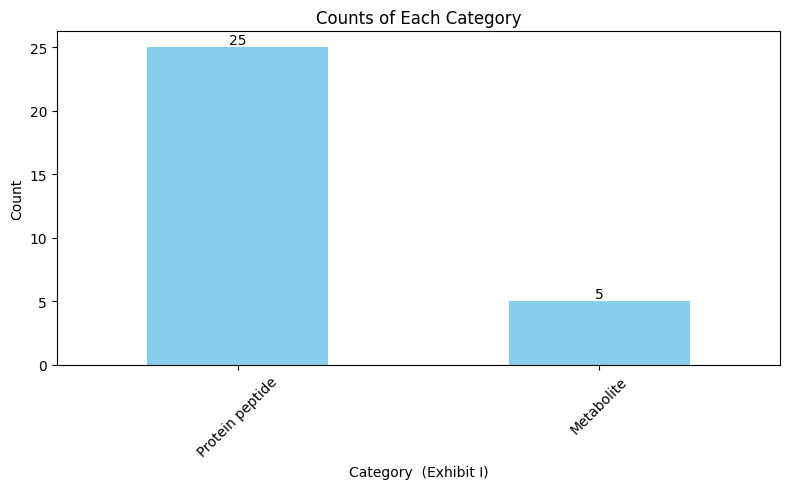

In [198]:

df = pd.read_csv('Appendix_A_Complete.csv')

# ---- 1. Value counts for the 'Category' column ----
plt.figure(figsize=(8, 5))
ax = df['Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Counts of Each Category')
plt.xlabel('Category  (Exhibit I)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()


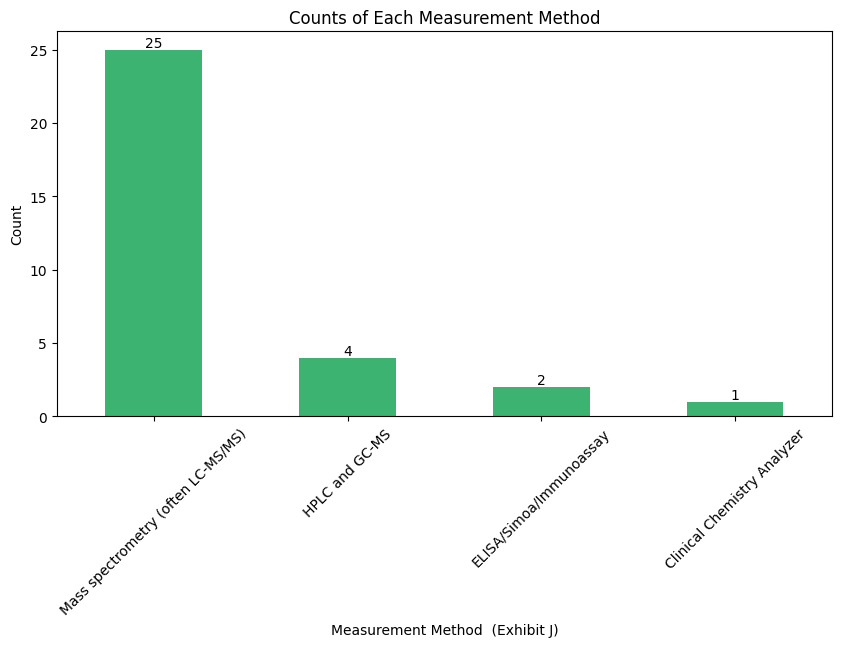

In [200]:
df = pd.read_csv('Appendix_Aa_Complete.csv')

plt.figure(figsize=(10, 5))
ax2 = df['Measurement Method'].value_counts().plot(kind='bar', color='mediumseagreen')
plt.title('Counts of Each Measurement Method')
plt.xlabel('Measurement Method  (Exhibit J)')
plt.ylabel('Count')
plt.xticks(rotation=45)


# Add count labels on top of each bar
for p in ax2.patches:
    ax2.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black')

plt.show()
